# Multi-output Regression Data EDA

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from notebook_utils import run_xgb_model, scores_barplot, \
    plot_feature_imps, run_lin_reg_model, print_results, run_models

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
sns.set_theme(style="whitegrid")

## Load & prep Data

In [2]:
# Load dataset from csv
data = pd.read_csv("data\\dataset-merged.csv")
data.drop(['sheepid'], axis=1, inplace=True)
print(data.head())

# Split training samples from target variables
input_cols = ['breed', 'sex', 'slaughgr', 'slweight(g)']
X = data[input_cols]
y = data.drop(input_cols, axis=1)

# Split train & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)
# print('Train set shape:', X_train.shape, y_train.shape)
# print('Test set shape:', X_test.shape, y_test.shape)


   breed  sex  slaughgr  slweight(g)  woolfr  blood  feet  pelt  fullGI  mesent  epipl  liver  spleen  pluck  head  warmcarc  kidney  KKCF  tail  coldcarc  mw%  WtBefDIS  LEG  CHUMP  LOIN  BREAST  BESTEND  MIDNECK  SHOULDER  NECK
0      1    1         1        12399     150    575   450  1250    1400     100    150    275      30    425   635      6850      32   122    32      6612   25      3280  820    307   336     323      236      477       665   110
1      1    1         1        12500     130    575   475  1245    1500      75     75    300      50    525   650      6800      32    78    32      6542   25      3180  803    298   322     290      242      454       682    94
2      1    1         1        12300     140    600   475  1200    1300     100    125    275      50    400   625      6875      32   118    44      6776   25      3350  812    350   328     316      238      500       670   130
3      1    1         1        12399     120    625   450  1225    1375     125 

## Summary
Σύνοψη του συνόλου δεδομένων.

In [3]:
print("Data shape:", data.shape, '\n')
data.info()
print("\nEmpty values/column sum:\n", data.isna().sum())
print('\nDescribe:')
data.describe()

Data shape: (119, 30) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   breed        119 non-null    int64
 1   sex          119 non-null    int64
 2   slaughgr     119 non-null    int64
 3   slweight(g)  119 non-null    int64
 4   woolfr       119 non-null    int64
 5   blood        119 non-null    int64
 6   feet         119 non-null    int64
 7   pelt         119 non-null    int64
 8   fullGI       119 non-null    int64
 9   mesent       119 non-null    int64
 10  epipl        119 non-null    int64
 11  liver        119 non-null    int64
 12  spleen       119 non-null    int64
 13  pluck        119 non-null    int64
 14  head         119 non-null    int64
 15  warmcarc     119 non-null    int64
 16  kidney       119 non-null    int64
 17  KKCF         119 non-null    int64
 18  tail         119 non-null    int64
 19  coldcarc     119 non-null 

,breed,sex,slaughgr,slweight(g),woolfr,blood,feet,pelt,fullGI,mesent,epipl,liver,spleen,pluck,head,warmcarc,kidney,KKCF,tail,coldcarc,mw%,WtBefDIS,LEG,CHUMP,LOIN,BREAST,BESTEND,MIDNECK,SHOULDER,NECK
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.991597,0.504202,2.983193,30293.310924,643.613445,1264.563025,697.445378,2588.478992,5596.344538,558.210084,782.890756,644.159664,62.394958,678.756303,1079.823529,15426.470588,49.764706,366.621849,76.277311,15031.361345,56.638655,7157.554622,1631.764706,690.563025,818.899160,735.529412,584.781513,1022.294118,1400.100840,251.529412
std,0.818181,0.502096,1.414113,15678.515993,353.645018,682.566737,283.001458,1232.859896,2630.089553,548.410135,941.082714,319.161879,30.964227,272.067195,419.041413,8655.367991,17.833840,366.340052,54.399639,8469.177268,27.255144,3959.369053,779.948485,406.575980,520.869504,483.940951,342.773759,578.012790,747.376954,157.972312
min,1.000000,0.000000,1.000000,9500.000000,120.000000,375.000000,300.000000,980.000000,1300.000000,50.000000,50.000000,175.000000,20.000000,275.000000,500.000000,4600.000000,14.000000,44.000000,20.000000,4434.000000,25.000000,2160.000000,546.000000,200.000000,216.000000,180.000000,170.000000,294.000000,452.000000,64.000000
25%,1.000000,0.000000,2.000000,17899.000000,330.000000,692.500000,475.000000,1632.500000,3455.000000,145.000000,150.000000,362.500000,40.000000,427.500000,713.000000,8375.000000,36.000000,98.000000,37.000000,8137.500000,35.000000,3910.000000,1015.000000,350.000000,398.500000,351.000000,293.000000,560.000000,761.500000,140.000000
50%,2.000000,1.000000,3.000000,25600.000000,600.000000,1100.000000,650.000000,2250.000000,5500.000000,325.000000,300.000000,575.000000,55.000000,625.000000,975.000000,12800.000000,46.000000,188.000000,54.000000,12450.000000,50.000000,5960.000000,1425.000000,608.000000,656.000000,584.000000,486.000000,852.000000,1150.000000,200.000000
75%,3.000000,1.000000,4.000000,39049.500000,950.000000,1837.500000,887.500000,3250.000000,7250.000000,762.500000,1075.000000,875.000000,80.000000,887.500000,1325.000000,20725.000000,64.000000,480.500000,98.000000,20200.000000,75.000000,9222.500000,2120.000000,933.000000,1097.000000,1047.000000,806.000000,1256.000000,1822.000000,308.000000
max,3.000000,1.000000,5.000000,71599.000000,1400.000000,3000.000000,1625.000000,6800.000000,11500.000000,2125.000000,4200.000000,1400.000000,150.000000,1400.000000,2250.000000,37400.000000,100.000000,1630.000000,276.000000,36500.000000,100.000000,17495.000000,3736.000000,1716.000000,2432.000000,2100.000000,1480.000000,2586.000000,3528.000000,902.000000


* Το σύνολο δεδομένων περιέχει 119 παραδείγματα εκπαίδευσης με 31 χαρακτηριστικά το κάθε ένα (119x31). Γνωρίζουμε ότι απο
αυτά τα 31 χαρακτηριστικά, τα 4 θα χρησιμοποιηθούν ως δεδομένα εισόδου και τα υπόλοιπα 26 (αγνοώντας το id) θα είναι τα
χαρακτηριστικά που προσπαθούμε να προβλέψουμε.

* Όπως είδαμε, δέν υπάρχουν χαρακτηριστικά με ελλειπείς τιμές.

* Η μεταβλητή εισόδου "slweight(g)" αντιπροσωπεύει το βάρος σε γραμμάρια του ζώου. Βλέπουμε ότι το βάρος
κυμαίνεται μεταξύ 9500 και 71599. Η σχετικά μικρή διαφορά που παρατηρείται μεταξύ του median και του μέσου (mean)
δείχνει ότι μάλλον δέν υπάρχουν πολλοί outliers στη μεταβλητή και πιθανότατα ωφείλεται στο γεγονός ότι, μάλλον είναι
λογικό να υπάρχουν μεγάλες αποκλείσεις στα βάρη των διαφορετικών ζώων.

* Η μεταβλητή εισόδου "sex" είναι κατηγορική μεταβλητή, υποδηλώνει το φύλλο του ζώου και παίρνει τις τιμές 0 ή 1.

* Η μεταβλητή εισόδου "breed" είναι κατηγορική μεταβλητή, υποδηλώνει τη ράτσα του ζώου και παίρνει τιμές απο 1 έως 3.

* Η μεταβλητή εισόδου "slaughgr" είναι κατηγορική μεταβλητή και παίρνει τιμές απο 1 έως 5.

* Οι υπόλοιπες 26 μεταβλητές είναι μεταβλητές στόχοι είναι συνεχείς μεταβλητές και με εξαίρεση το "mw%" δηλώνουν επιμέρους βάρη
σε γραμμάρια (g).

<AxesSubplot:title={'center':'Animal slaughgr'}, xlabel='slaughgr', ylabel='count'>

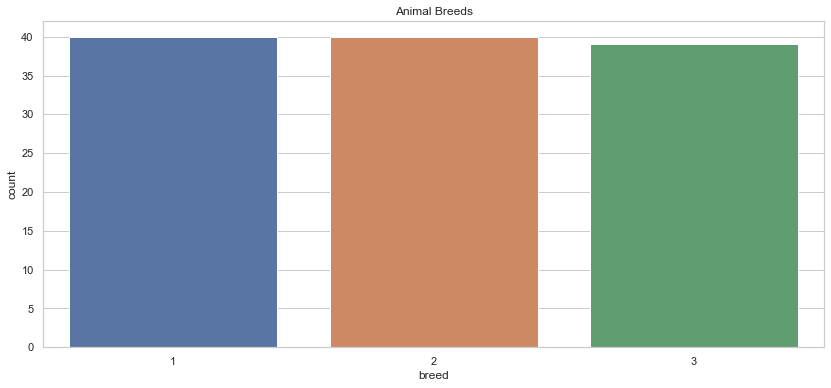

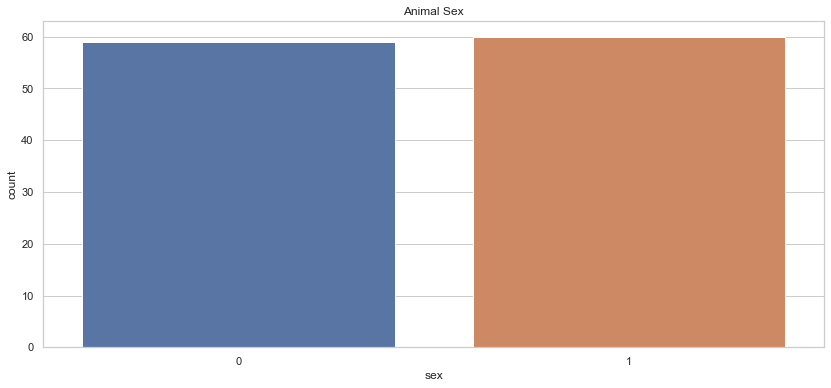

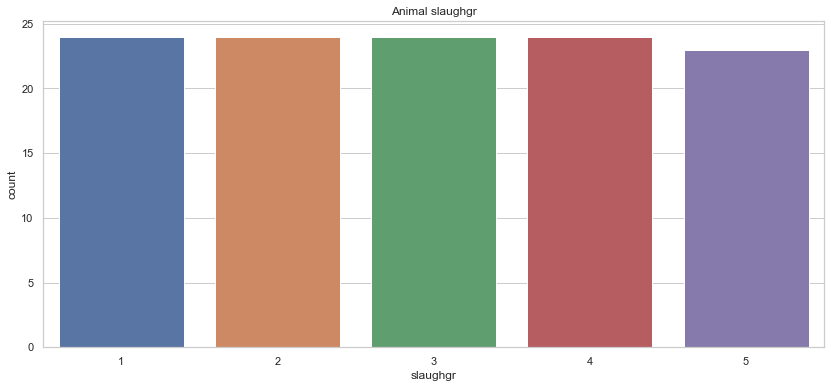

In [4]:
plt.figure(figsize=(14,6))
plt.title('Animal Breeds')
sns.countplot(x='breed', data=data)

plt.figure(figsize=(14,6))
plt.title('Animal Sex')
sns.countplot(x='sex', data=data)

plt.figure(figsize=(14,6))
plt.title('Animal slaughgr')
sns.countplot(x='slaughgr', data=data)

Όπως βλέπουμε παραπάνω, και για τα τρία κατηγορικά χαρακτηριστικά τα δεδομένα είνια κατανεμημένα ομοιόμορφα πράγμα που
σημαίνει ότι δεν υπάρχει μεροληψία ως προς κάποιο συγκεκριμένο χαρακτηριστικό.

## Examine Parts Variance
Θα χρησιοποιήσουμε boxplots για να διαπιστώσουμε τη διακύμανση που παρατηρείται στις τιμές κάθε εξαρτημένης μεταβλητής.

<AxesSubplot:>

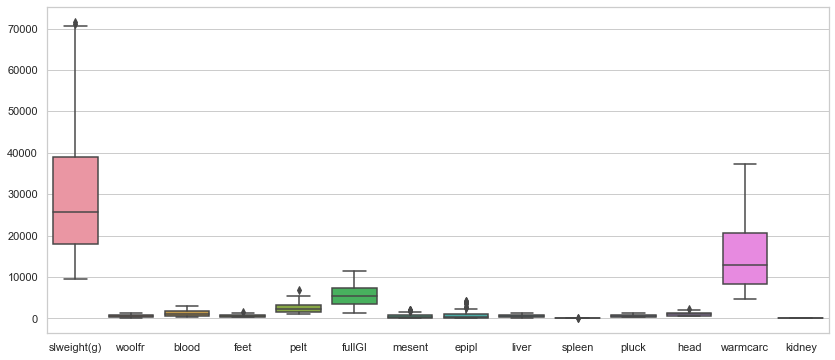

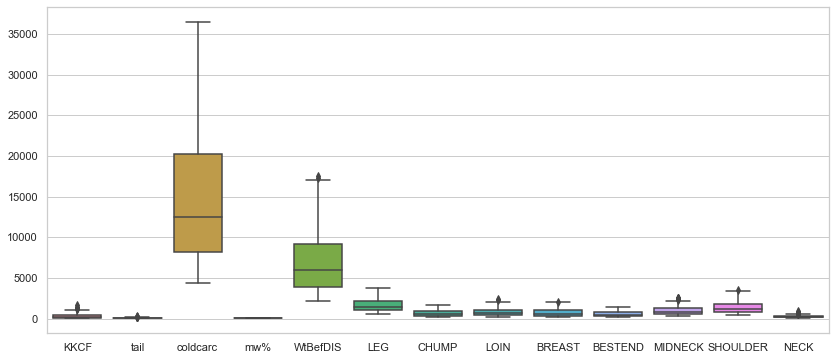

In [5]:
plt.figure(figsize=(14,6))
parts = data[['slweight(g)', 'woolfr','blood','feet','pelt','fullGI','mesent','epipl',
              'liver','spleen', 'pluck', 'head','warmcarc', 'kidney']]
sns.boxplot(data=parts)

plt.figure(figsize=(14,6))
parts = data[['KKCF', 'tail', 'coldcarc', 'mw%', 'WtBefDIS', 'LEG', 'CHUMP', 'LOIN',
              'BREAST', 'BESTEND', 'MIDNECK', 'SHOULDER', 'NECK']]
sns.boxplot(data=parts)

Απο τα boxplots παρατηρούμε ότι δεν παρατηρείται ιδιαίτερα μεγάλη διακύμανση στο βάρος των περισσότερων τμημάτων ζώων.
Τη μεγαλύτερη διακύμανση τη παρουσιάζουν τα ακόλουθα χαρακτηριστικά:"blood", "pelt", "fullGI" (?) και "WtfBefDIS" (?).
Επίσης, στο χαρακτηριστικό "epipl" κάποιες τιμές ξεφεύγουν και ίσως είναι outliers.

## Feature Correlation
Αρχικά θα διερευνήσουμε το βαθμό συσχέτισης μεταξύ όλων των χαρακτηριστικών.

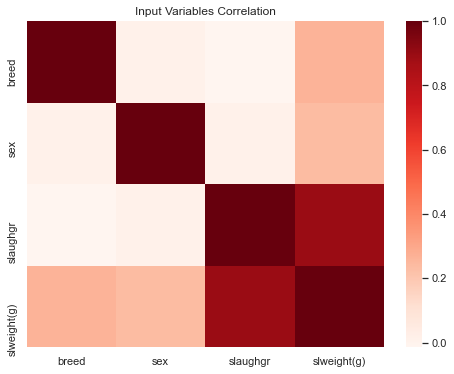

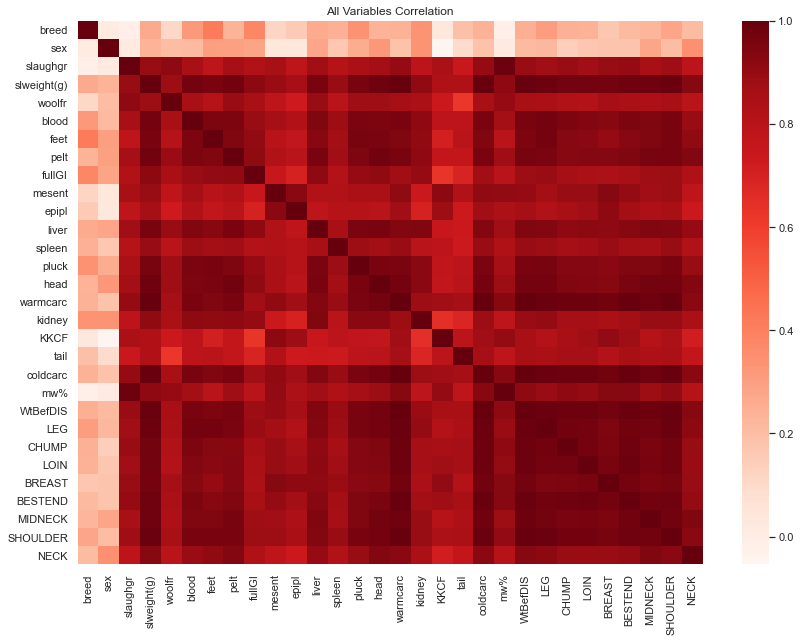

In [6]:
# Plot correlation heatmap only for input variables
plt.figure(figsize=(8,6))
plt.title('Input Variables Correlation')
input_cols_corr = X.corr()
sns.heatmap(input_cols_corr, annot=False, cmap='Reds')
plt.show()

# Plot correlation heatmap for all variables
plt.figure(figsize=(14,10))
plt.title('All Variables Correlation')
output_cols_corr = data.corr()
sns.heatmap(output_cols_corr, annot=False, cmap='Reds')# sns.set(font_scale=0.5)
plt.show()


Παρά το γεγονός ότι τα δεδομένα είναι πάρα πολλά για να είμαστε σε θέση να κατανοήσουμε το heatmap λεπτομερώς μπορούμε
εξάγουμε μερικά συμπεράσματα απο τη γενική εικόνα τους.

Πιό συγκεκριμένα, στο 1ο heatmap βλέπουμε μια αναπαράσταση του βαθμού συσχέτισης μεταξύ των μεταβλητλών εισόδου. Απο την
αναπαράσταση αυτή είναι εμφανές ότι τα χαρακτηριστιά εισόδου είναι αρκετά ασυσχέτιστα μεταξύ τους αλλά και με τα υπόλοιπα
χαρακτηριστικά με εξαίρεση τα χαρ/κα "slweight(g)" και "slaughgr" τα οπόια παρουσιάζουν υψηλή συσχέτιση μεταξύ τους.

Στό 2ο  heatmap είναι εμφανές πως τα δεδομένα εξόδου έχουν υψηλή συσχέτιση μεταξύ τους αλλά καί με τα δεδομένα εισόδου καθώς
το μεγαλύτερο μέςρος του heatmap είναι βαθιά κοκκινισμένο. Επίσης επαληθέυεται αυτό που παρατηρήσαμε στο 1ο heatmap, δηλαδή
ότι οι συσχετίσεις μεταξύ των μεταβλητών εισόδου είναι χαμηλές σε σχέση με τις συσχετίσεις μεταξύ των δεδομένων εξόδου.

## Feature Importance
Θα κάνουμε μια ανάλυση της σημασίας των χαρακτηριστικών εισόδων στις εξόδους χρησιμοποιώντας τους συντελεστές που
προκύπτουν απο την εκπαίδευση μοντέλων παλλινδρόμησης όπως οι αλγόριθμος XGBoost και Linear Regression.
### XGBoost

XGBoost
R2 score: 0.9829901891160502
MAE: 65.97458269307901
RMSE: 90.0847478648546
MAPE: 0.06390209611956575



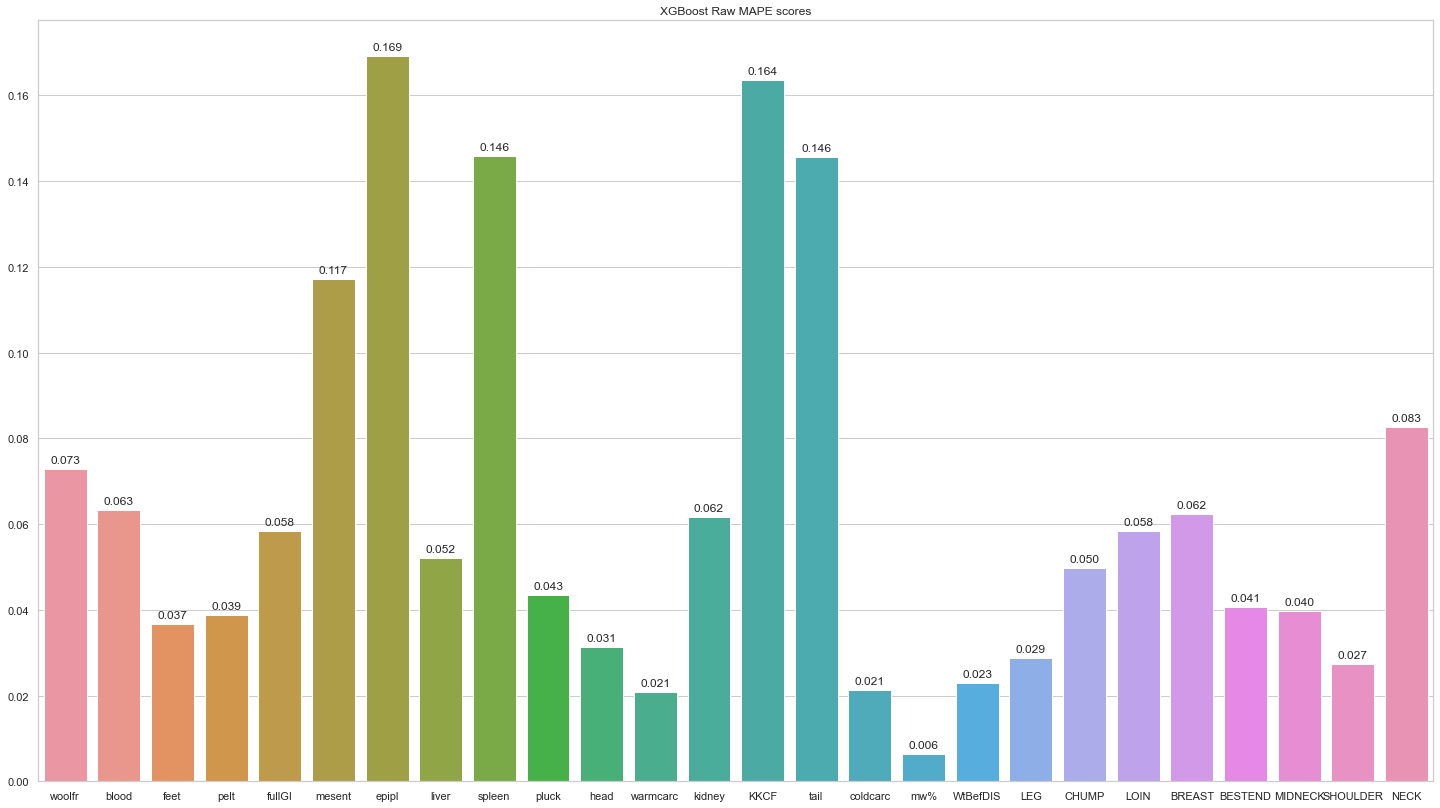

In [7]:
# Run xgboost model & get results
res = run_xgb_model(X, y)
# Print model scores (uniform average)
print_results(res)
# Plot individual target variable scores
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='XGBoost Raw MAPE scores')

Το μέσο ομοιόμορφο RMSE σφάλμα είναι 90.084 και το MAPE είναι 0.064.

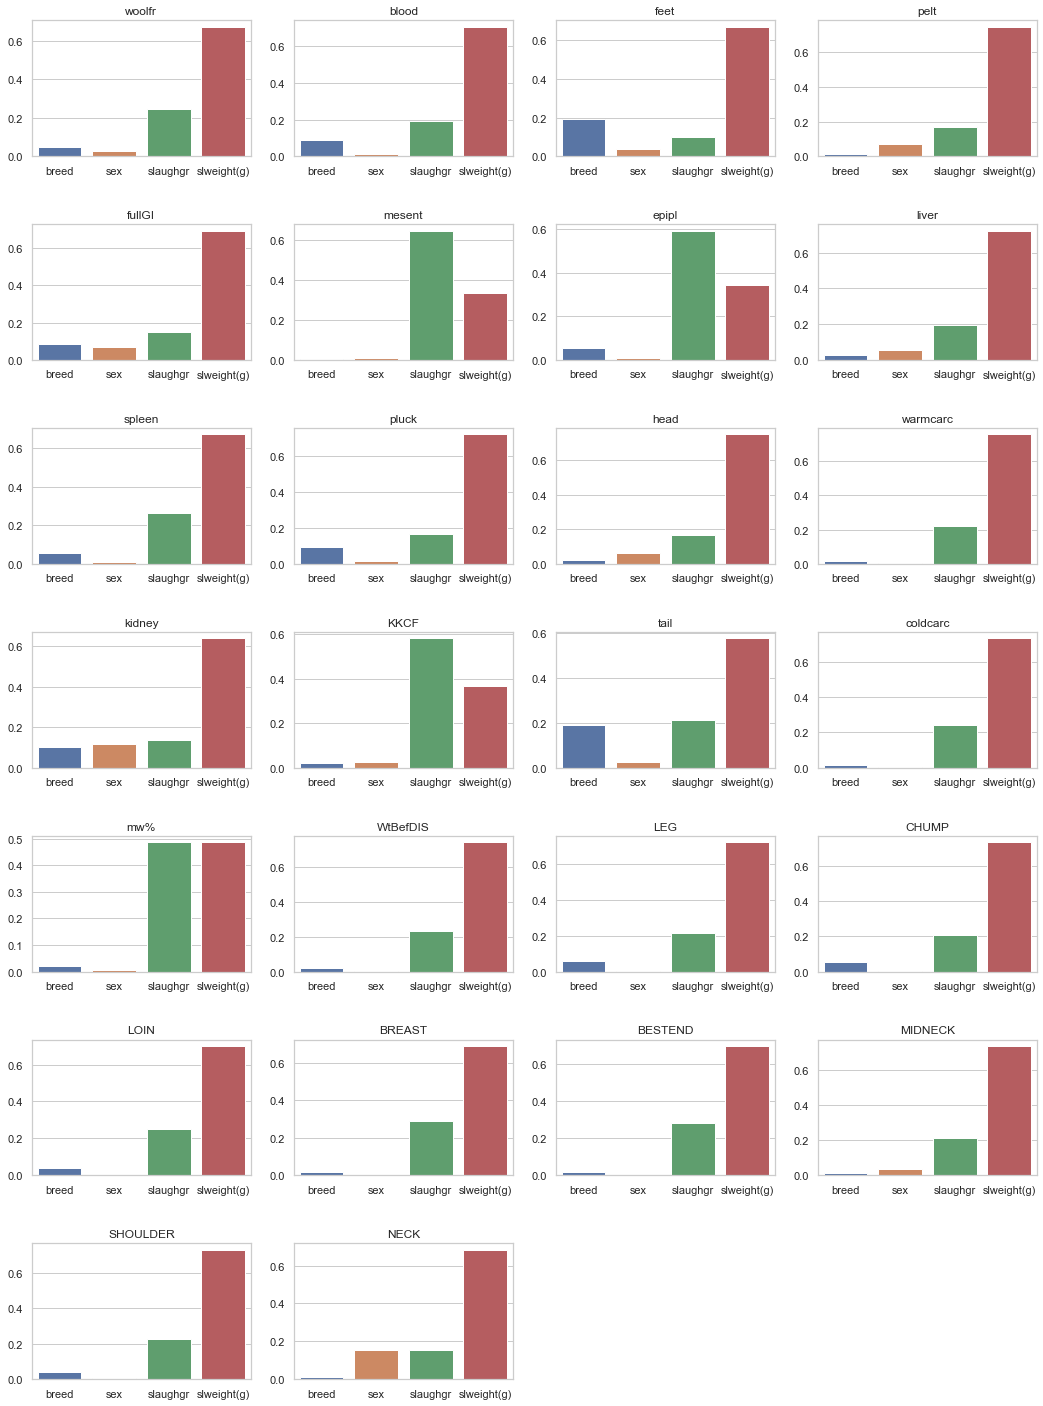

In [8]:
# Plot feature importances barplot for each target variable
plot_feature_imps(res['feat_imps'], X.columns, y.columns)

Είναι ξεκάθαρο ότι το πιό σημαντικό χαρακτηριστικό είναι το slweight(g), ενώ το breed και το sex επηρεάζουν πολύ λίγο
τη πρόβλεψη των μεταβλητών στόχων. Το slaughgr επίσης επηρεάζει αρκετά κάποιες μεταβλητές στόχους, ωστόσο, όπως είδαμε
παραπάνω ο βαθμός συσχέτισης του με το slweight(g) είναι υψηλός οπότε δεν είναι ξεκάθαρο το αν όντως επηρρεάζει
τις προβλέψεις.


### Linear Regression

Linear Regression
R2 score: 0.9228547631424415
MAE: 153.66473846406603
RMSE: 202.43171039623576
MAPE: 0.15921412741903362



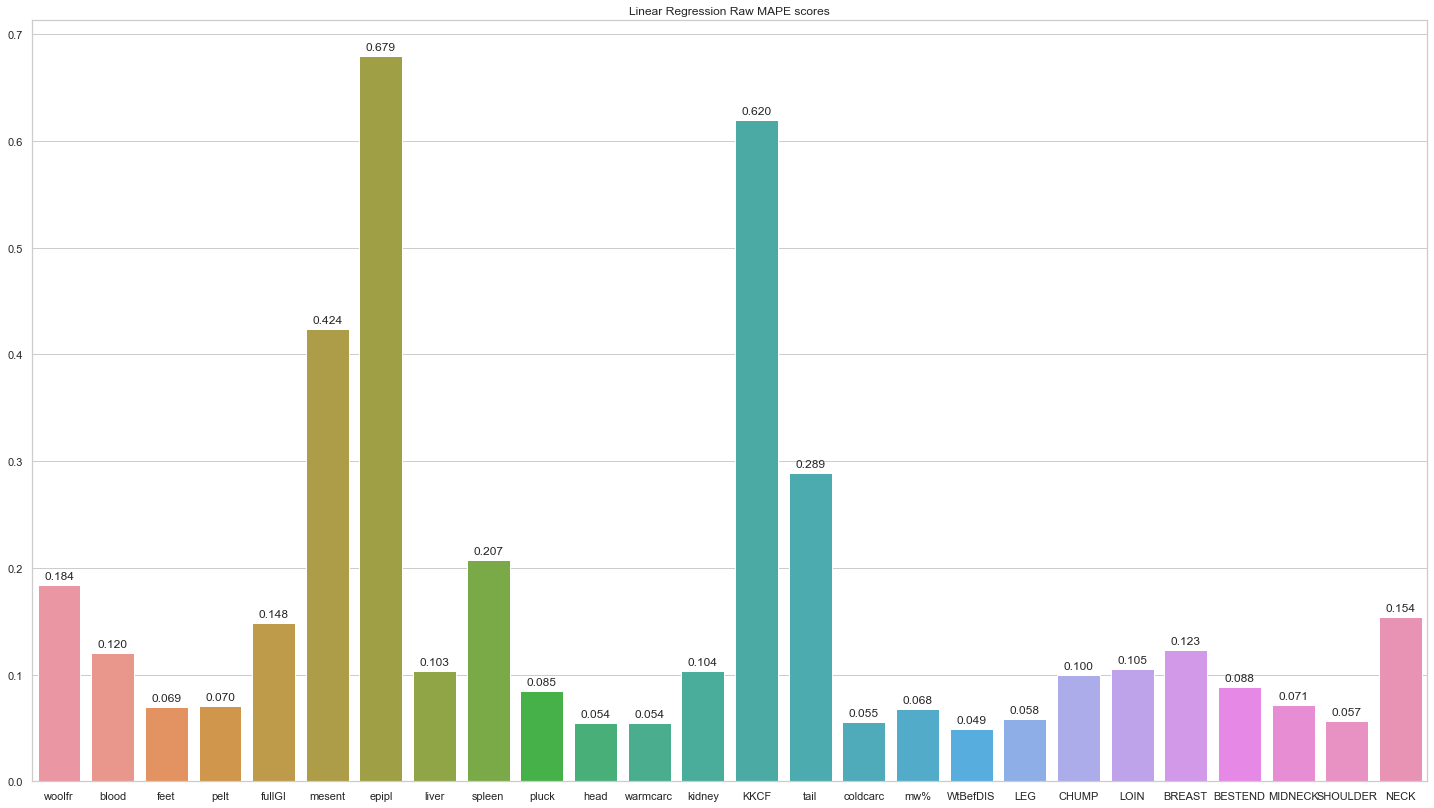

In [9]:
# Run Linear Regression model & get results
res = run_lin_reg_model(X, y)
print_results(res)
# Plot individual RMSE scores
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='Linear Regression Raw MAPE scores')

Το μοντέλο Linear Regression αποδίδει αρκετά υψηλότερο ΜΕΣΟ σφάλμα συγκρικά με τον XGBoost με RMSE ~202.43 και
MAPE ~0.160.

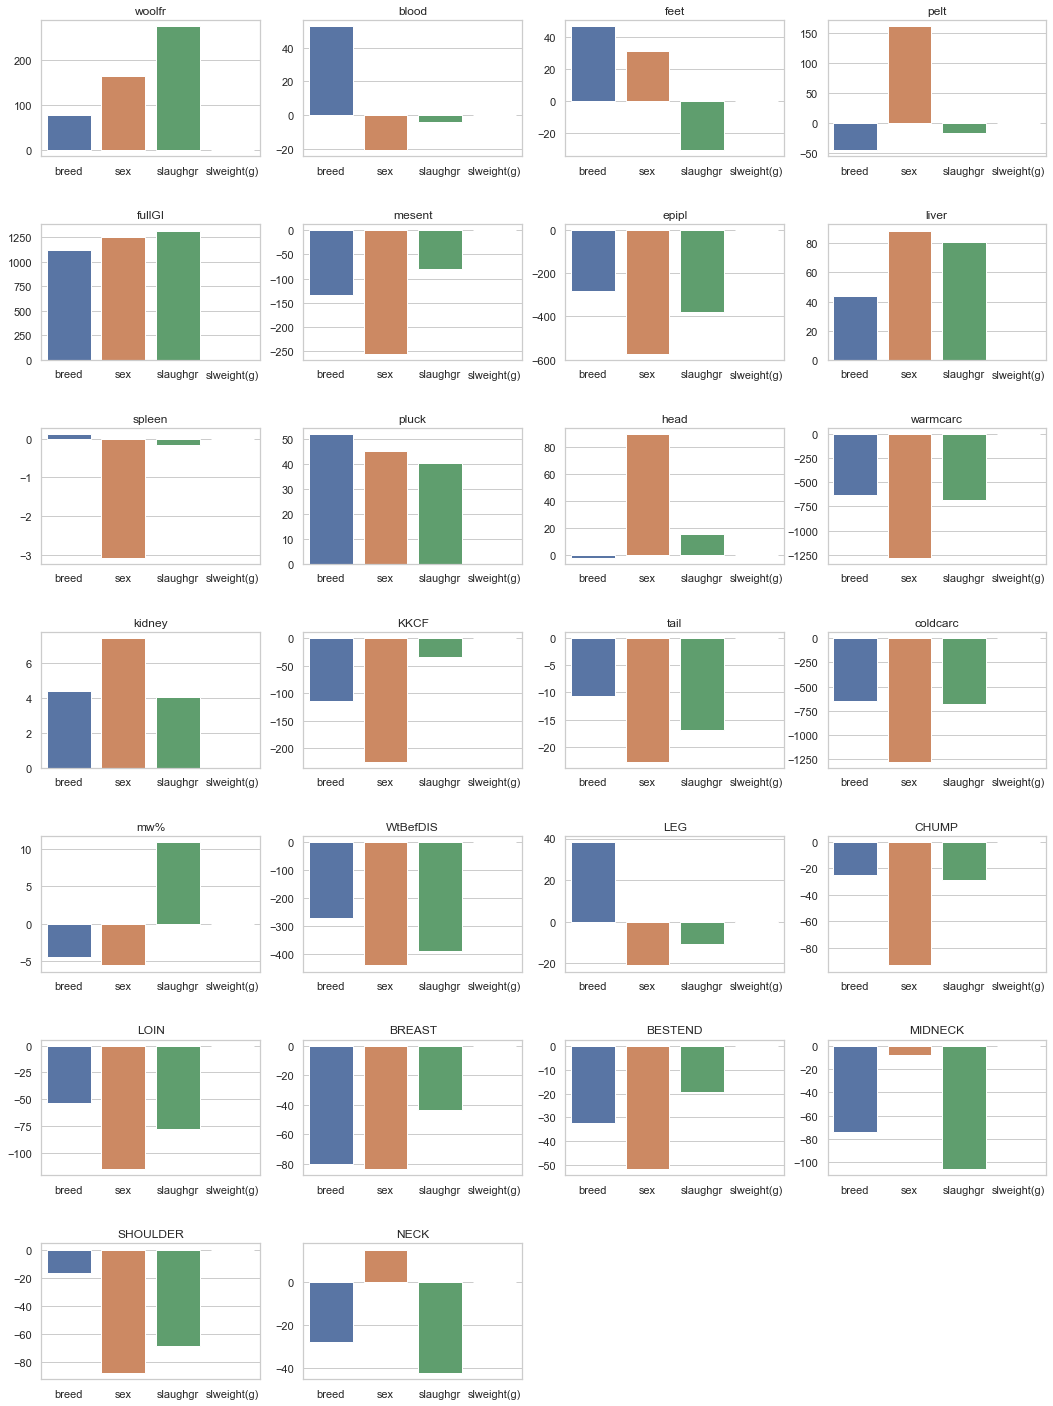

In [10]:
# Plot coefficients
plot_feature_imps(res['feat_imps'], X.columns, y.columns)

Όπως βλέπουμε στα παραπάνω barplots, δεν μπορούμε να βγάλουμε και πολλά συμπεράσματα απο τους συντελεστές που έχει
αναθέσει ο Linear Regression στις  μεταβλητές για το feature importance των μεταβλητών καθώς οι συντελεστές κάθε
ανεκάρτητης μεταβλητής βρίσκονται σε πολύ διαφορετικές κλίμακες και ο συντελεστής του χαρακτηριστικό slweight(g) δεν
φαίνεται κάν δίπλα στους συντελεστές των υπολοίπων χαρακτηριστικών. Παρακάτω θα δοκιμάσουμε να κάνουμε scale στα
δεδομένα προτού τρέξουμε τον Linear Regression προκειμένου να εξάγουμε μια καλύτερη αναπαράσταση αλλά και να βελτιώσουμε
τα αποτελέσματα του μοντέλου, αφού ο Linear Regression, σε αντίθεση με τον XGBoost επηρεάζεται αρκετά απο το scale των
δεδομένων.

### Linear Regression with Scaling

Κάνουμε scale τα δεδομένα χρησιμοποιώντας τον Standard scaler του sklearn και τρέχουμε
ξανά το Linear Regression μοντέλο.

In [11]:
# Scale data
std_scaler = StandardScaler()
X_scaled = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
y_scaled = pd.DataFrame(std_scaler.fit_transform(y), columns=y.columns)

Linear Regression
R2 score: 0.9228547631424416
MAE: 0.18605653204899883
RMSE: 0.2507509729545011
MAPE: 0.6601314582334417



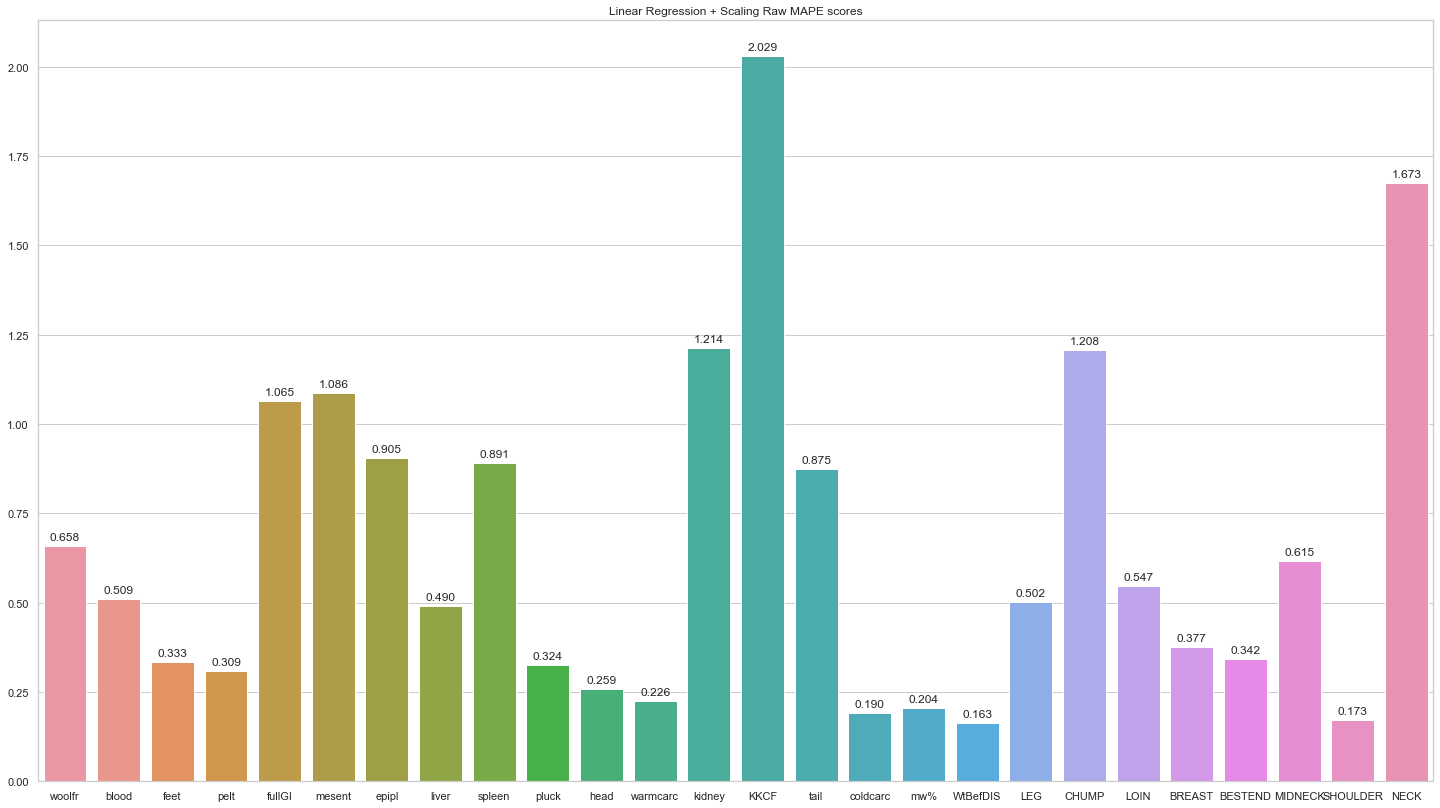

In [12]:
# Rerun Linear regression model on scaled data
res = run_lin_reg_model(X_scaled, y_scaled)
print_results(res)
# Plot individual MAPE scores
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='Linear Regression + Scaling Raw MAPE scores')

* Με το scaling ο Linear regression επιτυγχάνει ακριβώς το ίδιο R2 score συγκριτκά με την εκτέλεση σε unscaled δεδομένα.
* Το μέσο ομοιόμορφο RMSE είναι ~0.250 και το MAPE ~0.660.

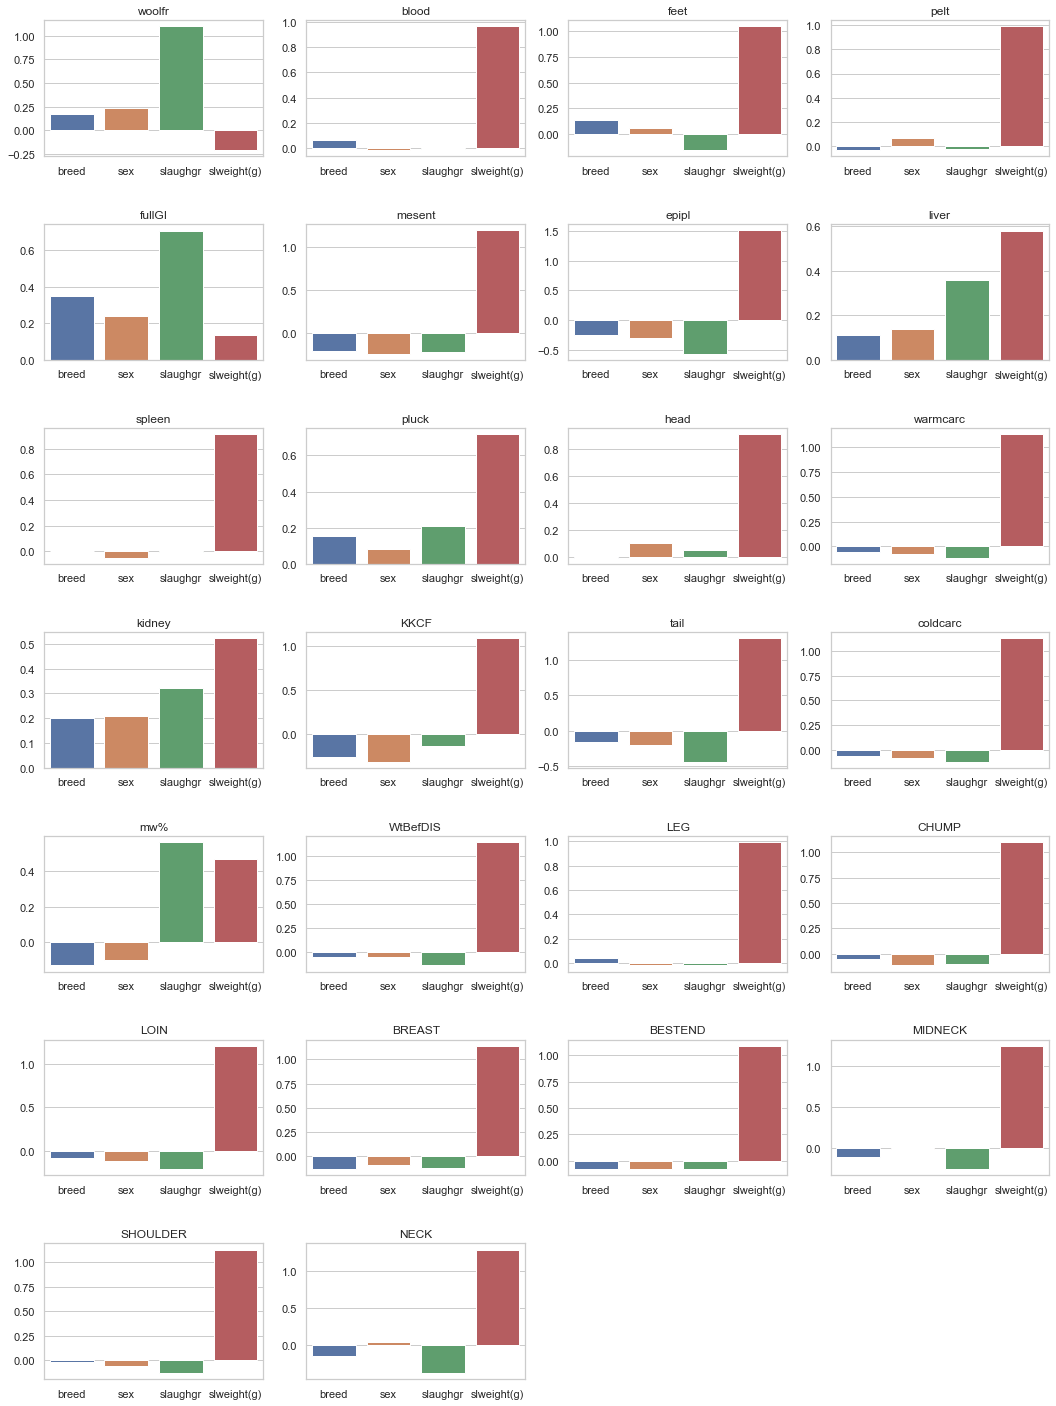

In [13]:
# Plot coefficients
plot_feature_imps(res['feat_imps'], X.columns, y.columns)

* Παρατηρώντας τα barplots για κάθε μεταβλητή στόχο, βλέπουμε ότι και πάλι στις περισσότερες περιπτώσεις η μεταβλητή
"slweight(gr)" έχει το μεγαλύτερο importance για τη πρόβλεψη.
* Οι αρνητικές τιμές των συντελεστών που παρατηρούνται σε κάποιες περιπτώσεις υποδηλώνουν αρνητική συσχέτιση.
* Επίσης, αξίζει να σημειωθεί ότι οι μεταβλητές "slweight(gr)" και "slaughgr" έχουν πολύ υψηλή συσχέτιση όπως συζητήσαμε
παραπάνω (Multicolinearity). Επομένως, η υψηλή συσχέτιση που παρατηρήται σε κάποιες περιπτώσεις ίσως είναι παραπλανιτική
ειδικά στη περίπτωση του Linear Regression, καθώς επηρεάζεται περισσότερο απο αυτό το φαινόμενο συγκριτικά με τον
XGBoost που βασίζεται σε δενδρικές δομές.

### XGBoost with Scaling
Προκειμένου να είμαστε σε θέση να συγκρίνουμε καλύτερα τα δύο μοντέλα θα τρέξουμε και τον XGBoost με scaling.

XGBoost
R2 score: 0.9845526724181997
MAE: 0.08238093424360919
RMSE: 0.1102775687242093
MAPE: 0.33128835435194165



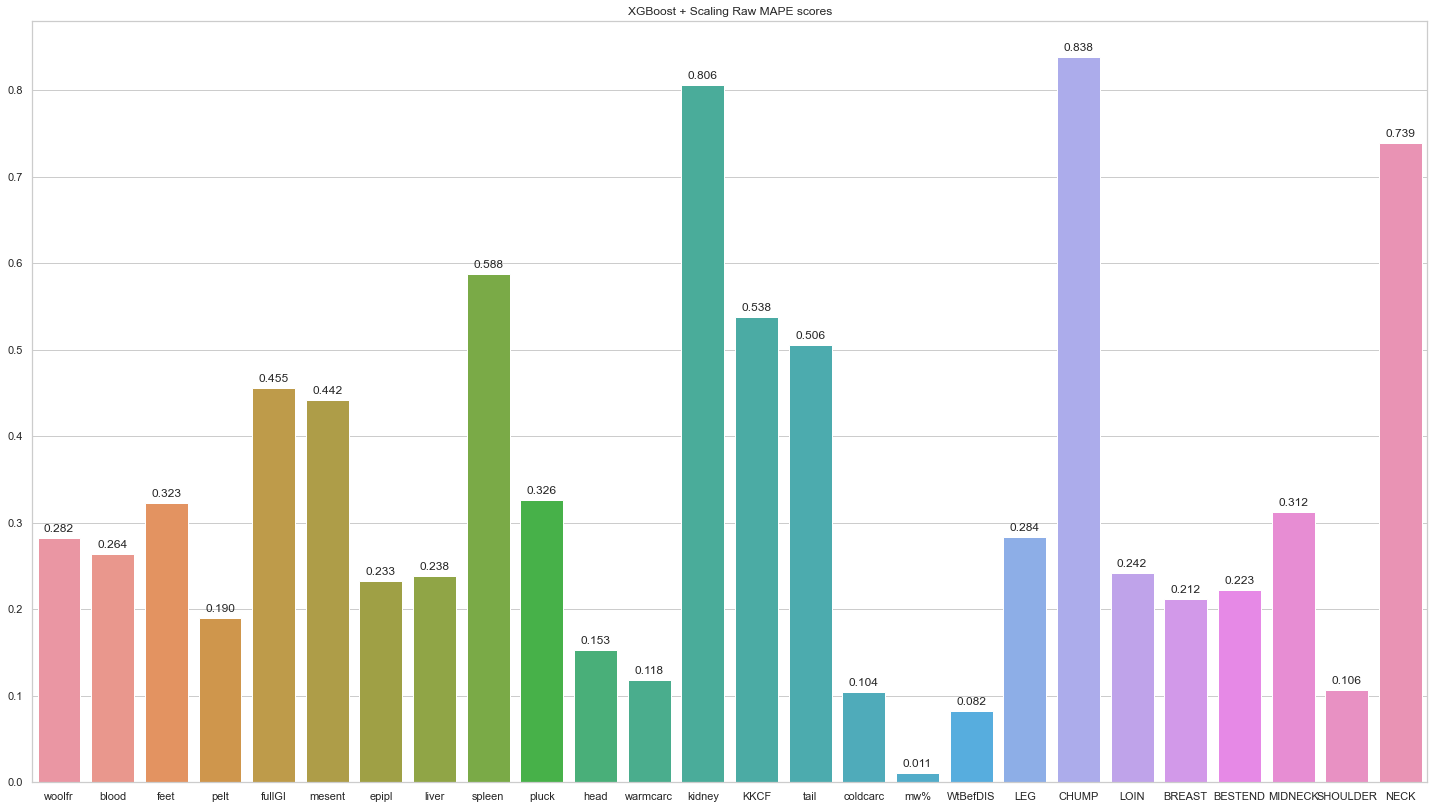

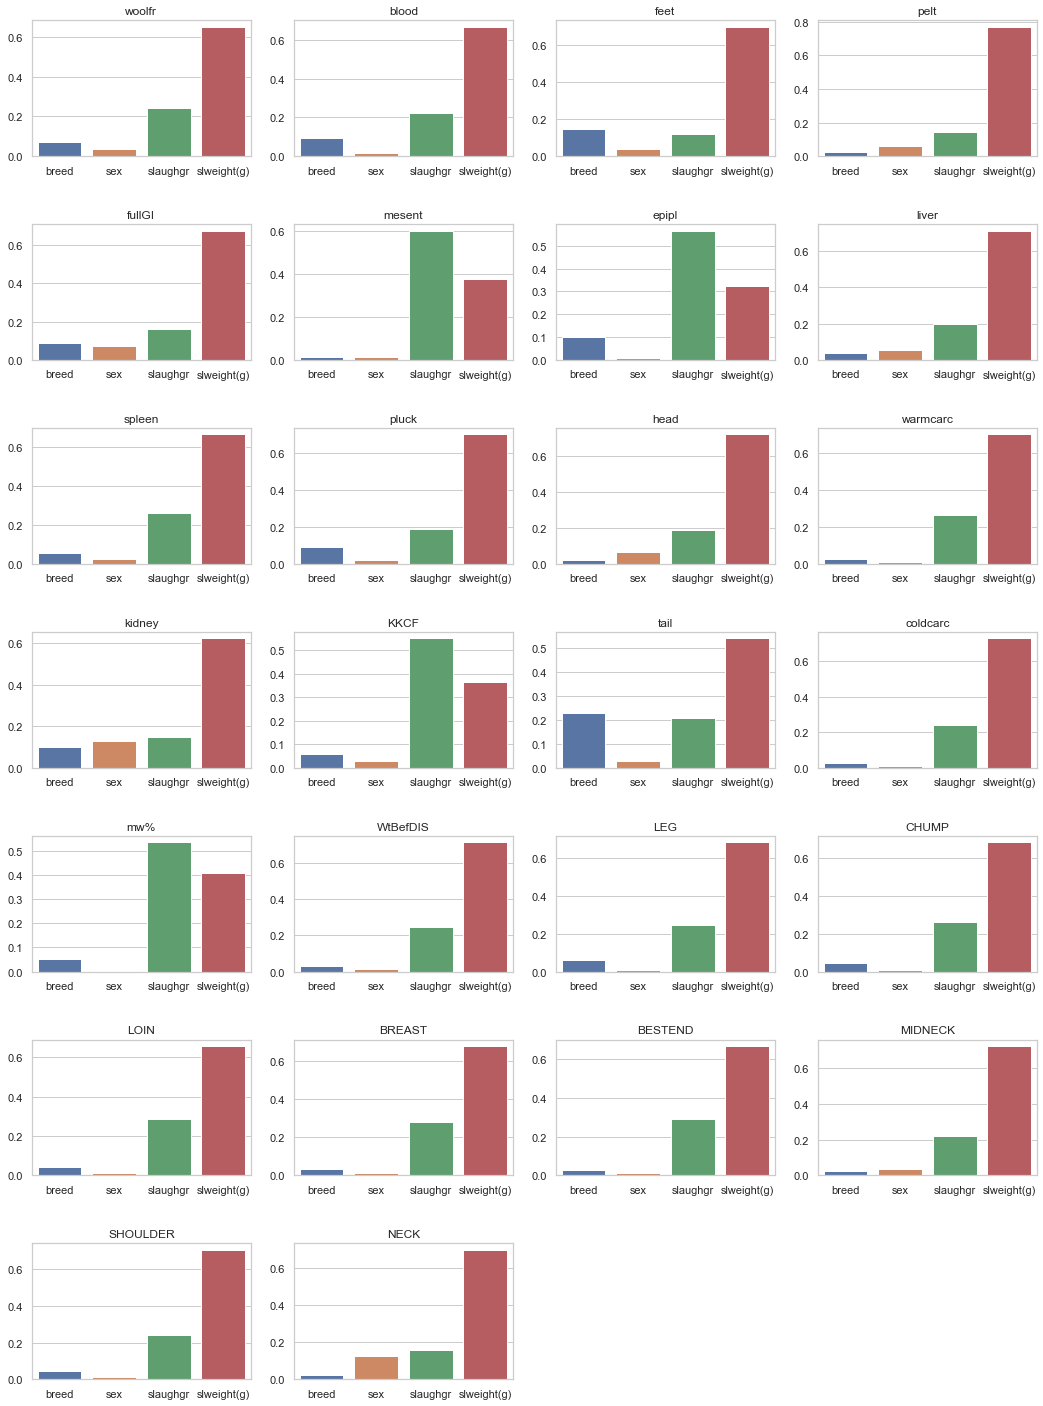

In [14]:
# Run xgboost model with scaling & get results
res = run_xgb_model(X_scaled, y_scaled)
print_results(res)
# Present raw rmse scores with a barplot
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='XGBoost + Scaling Raw MAPE scores')
# Plot coefficients
plot_feature_imps(res['feat_imps'], X.columns, y.columns)

* O XGBoost εξακολουθεί να έχει λίγο καλύτερη απόδοση απο τον Linear Regression.
* Μέσο ομοιόμορφο RMSE ~0.2309 και MAPE ~0.3312
* Ωστόσο, τα feature importances δεν επηρεάζονται ιδιαίτερα απο το scaling.
* Αυτό είναι αναμενόμενο καθώς ο XGBoost βασίζεται σε δένδρα απόφασης και επομένως δεν επηρρεάζεται απο το scaling.
Ωστόσο, αλγόριθμοι όπως ο linear regression είναι πιό ευαίσθητοι στο scaling και πολλές φορές είναι απαραίτητο.
* Θα συνεχίσουμε τα πειράματα χρησιμοποιώντας scaling απο εδώ και πέρα προκειμένου να μπορούμε να συγρίνουμε πιό εύκολα
τα αποτελέσματα των δύο μοντέλων.

## Αφαίρεση Μη-σημαντικών Χαρακτηριστικών
Για να κάνουμε πιό καθαρά τις δοκιμές χρησιμοποιώντας τα δύο μοντέλα κάθε φορά, θα χρησιμοποιήσουμε μια συνάρτηση που
τρέχει τα δύο μοντέλα και παρουσιάζει τα αποτελέσματα απευθείας.
Στη συνέχεια, θα εξετάσουμε την επίδραση των μή-σημαντικών χαρ/κων στα δύο μοντέλα.

### Drop "sex" column

XGBoost
R2 score: 0.9739720219445118
MAE: 0.10743747838557992
RMSE: 0.14597895427691004
MAPE: 0.40421719548995844

Linear Regression
R2 score: 0.9102682067710831
MAE: 0.2009977681488688
RMSE: 0.26979377285780975
MAPE: 0.7377995101021076



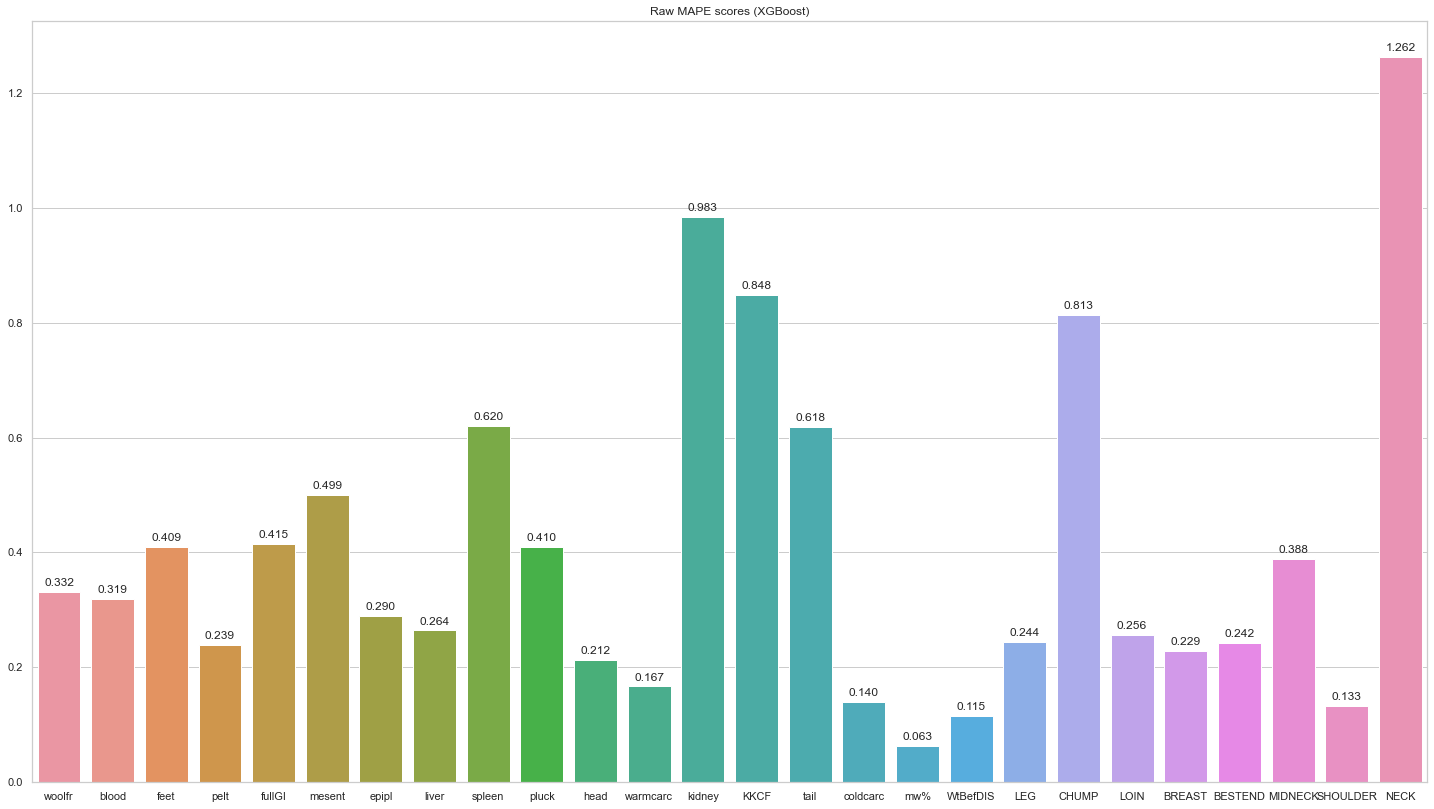

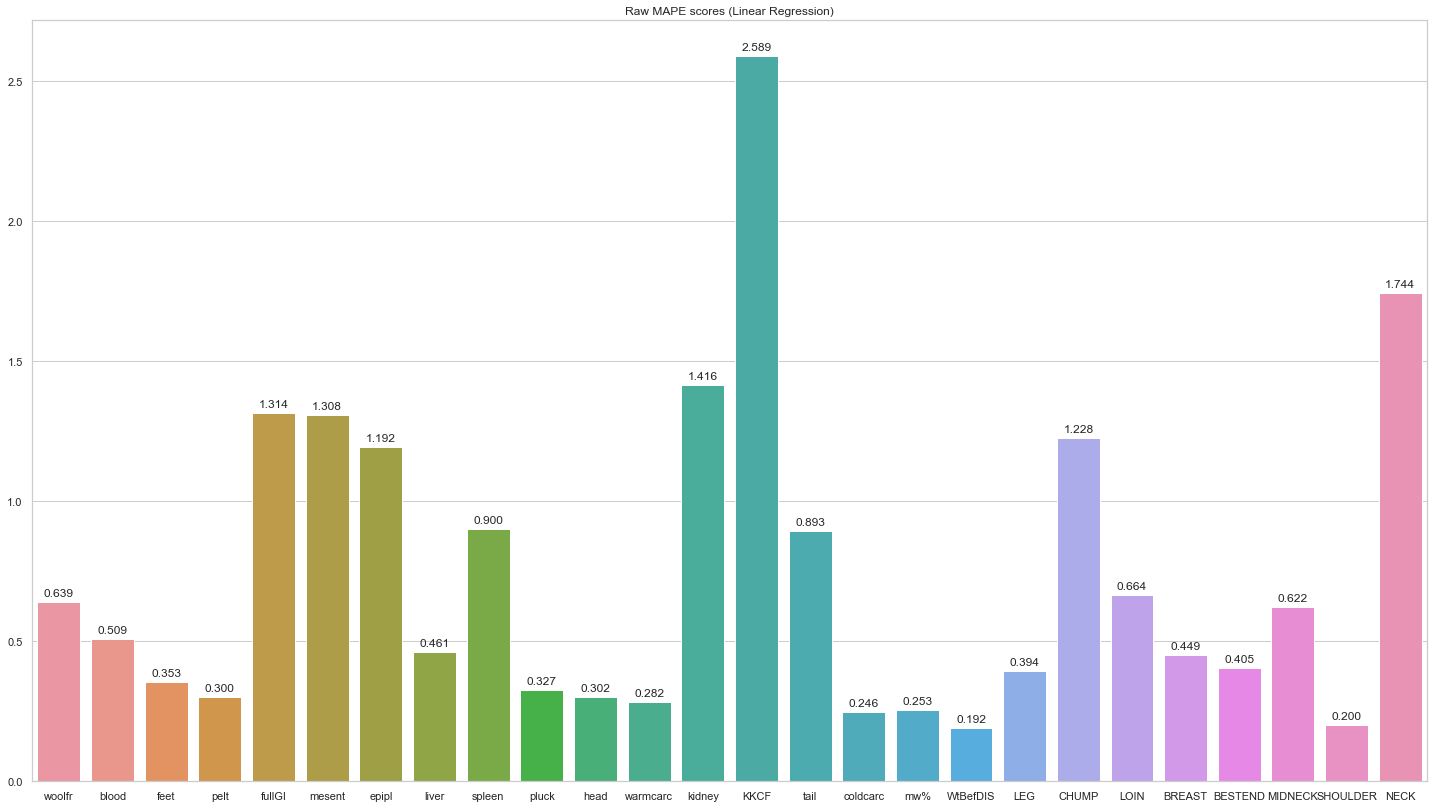

In [15]:
r = run_models(X_scaled.drop(['sex'], axis=1), y_scaled, show_plots=True)

* Ρίχνοντας τη στήλη 'sex' παρατηρούμε μια μικρή αύξηση στα MAPE και των δύο αλγορίθμων (~0.07) και μια μικρή μείωση στα R2
scores τους (~0.02).
* Επομένως συμπεραίνουμε ότι ρίχνοντας το "sex" δέν αυξάνεται η επίδοση.

### Drop "breed" column

XGBoost
R2 score: 0.9680790787544176
MAE: 0.12347519172105295
RMSE: 0.16611523703013578
MAPE: 0.42620635333737944

Linear Regression
R2 score: 0.9130183324774155
MAE: 0.2000086974492567
RMSE: 0.26670957129615763
MAPE: 0.7507763647642841



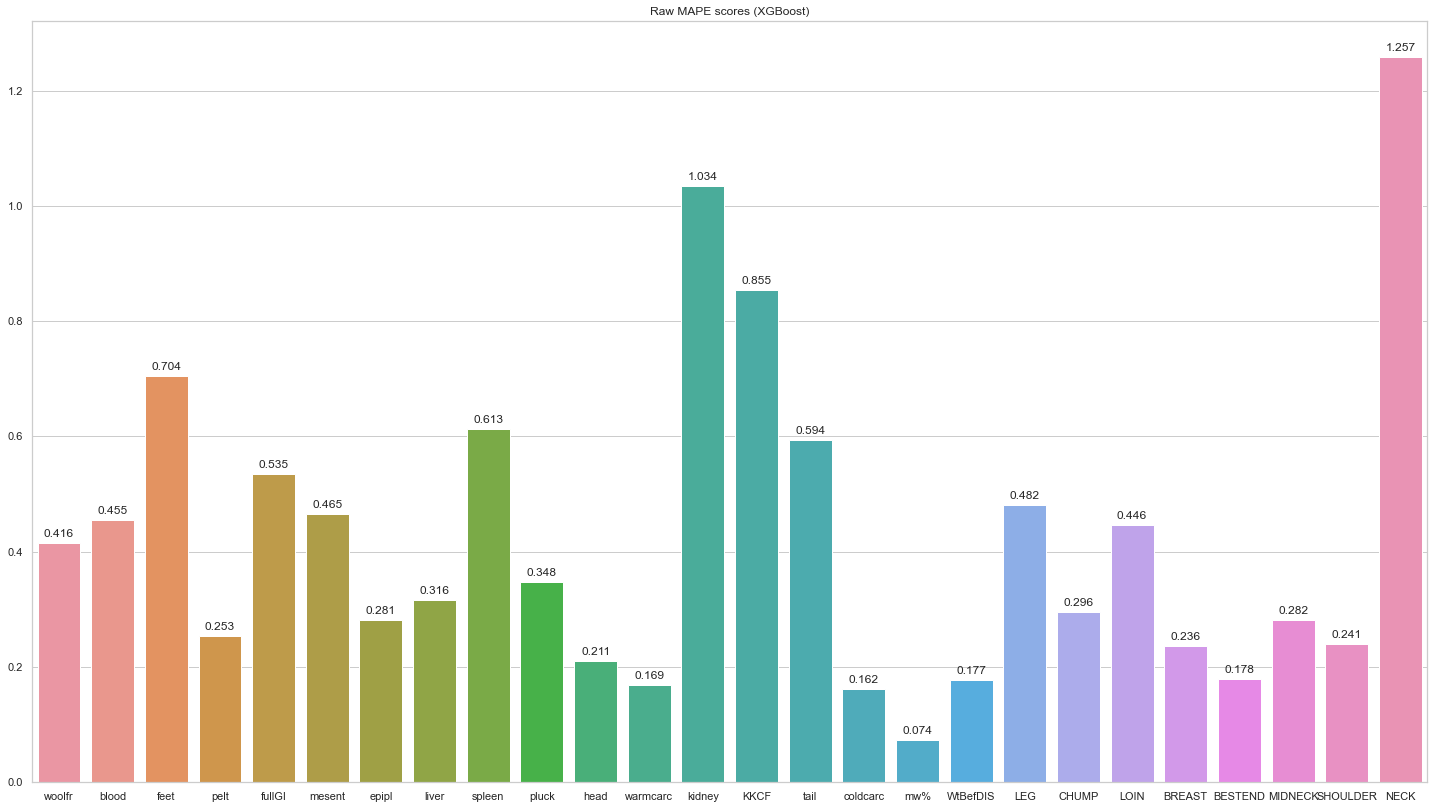

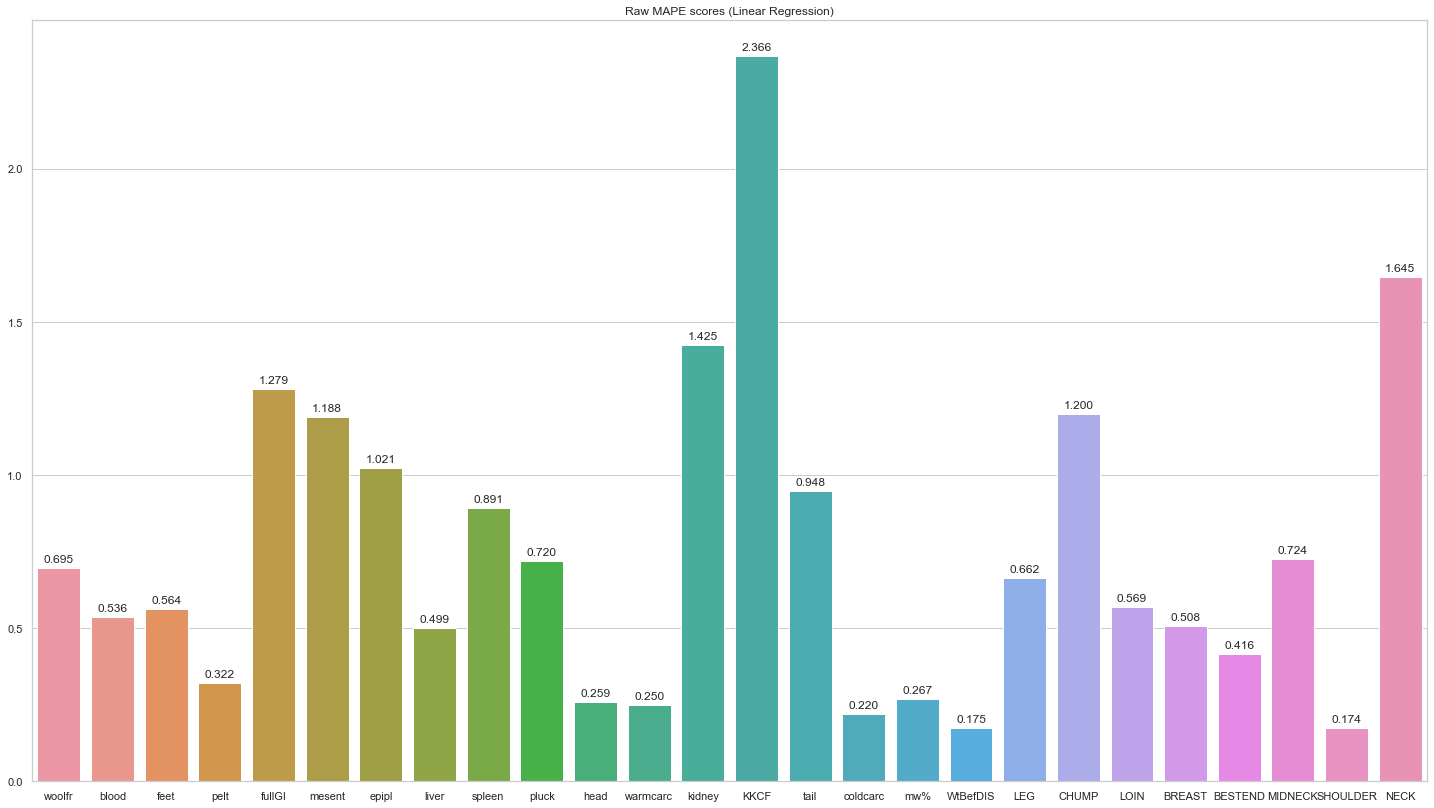

In [16]:
r = run_models(X_scaled.drop(['breed'], axis=1), y_scaled, show_plots=True)

* Ρίχνοντας τη στήλη "breed" ανεβαίνει το MAPE και στα δύο μοντέλα (κατά ~0.05 στον XGBoost
και ~0.1 στον Linear Regression).
* Επομένως για την ώρα θα κρατήσουμε το χαρακτηριστικό.
* Αυτή τη φορά ο Linear Regression φαίνεται πως επηρρεάστηκε λίγο περισσότερο σε σχέση με τον XGBoost.

### Drop "slaughgr" column
Παρόλο που το χαρακτηριστικό "slaughgr" είναι σχετικά σημαντικό για τη πρόβλεψη πολλών εξόδων είδαμε παραπάνω πώς έχει
πολύ υψηλό correlation με το χαρακτηριστικό "weight(gr)" γεγονός που γενά το ερώτημα: Πόση παραπάνω πληροφορία προσφέρει
πραγματικά το χαρακτηριστικό "slaughgr";

XGBoost
R2 score: 0.9702558366168401
MAE: 0.1166152504980848
RMSE: 0.16039648369438173
MAPE: 0.4246734704762494

Linear Regression
R2 score: 0.9130050445427015
MAE: 0.19954223871802867
RMSE: 0.2667319186539046
MAPE: 0.7039686685469556



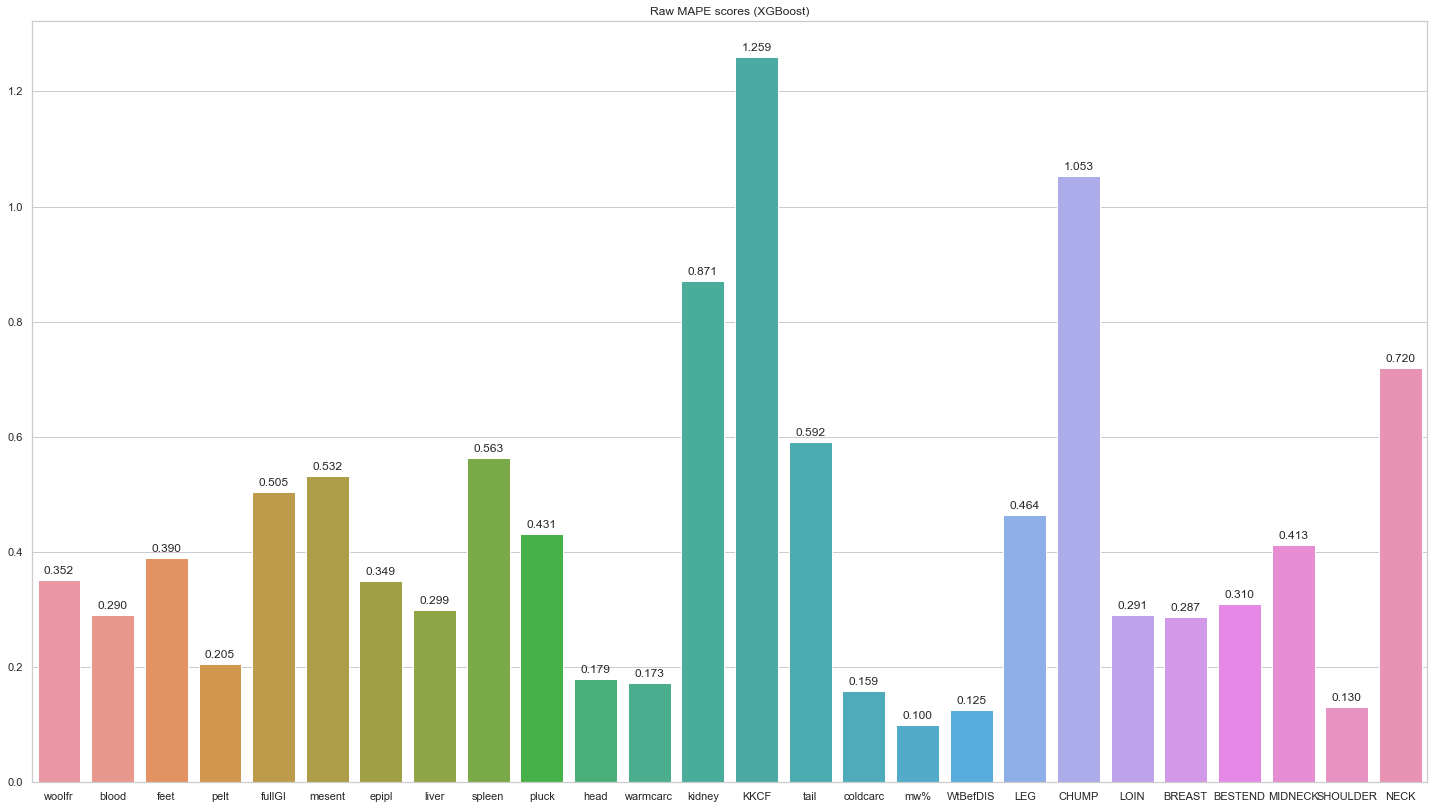

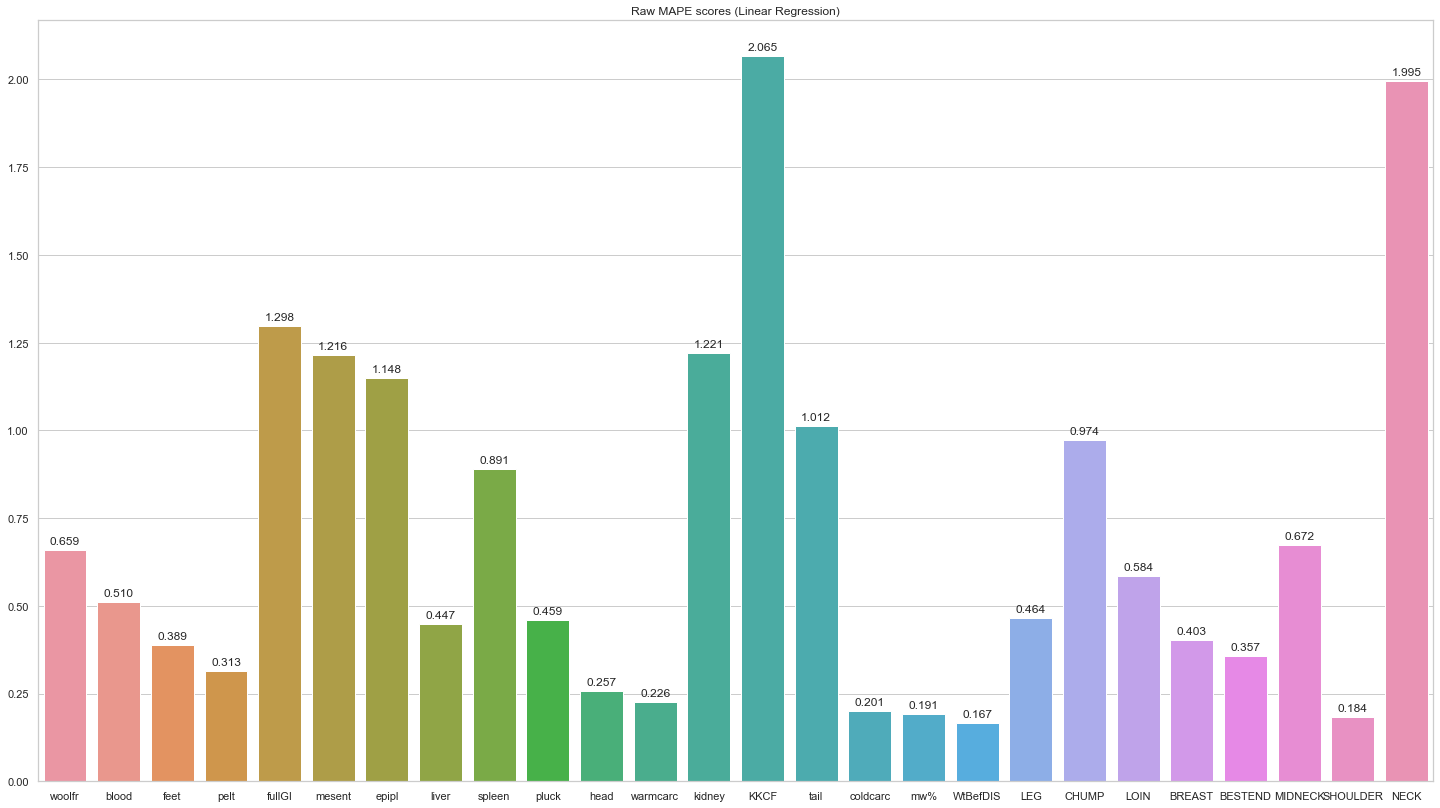

In [17]:
r = run_models(X_scaled.drop(['slaughgr'], axis=1), y_scaled, show_plots=True)

* Παρατηρούμε πως παρόλο που το importance του "slaughgr" φαίνεται να είναι υψηλό για πολλές μεταβλητές εξόδου,
η μή χρήση του αύξησε λίγο το σφάλμα (περίπου όσο και μη χρήση των φαινομενικά λιγότερο σημαντικών features "sex"
και "breed").
* O XGBoost φαίνεται πως επηρρεάστηκε περισσότερο σε σχέση με τον Linear Regression αφου η αύξηση στο σφάλμα
του είναι μεγαλύτερη.
* Δεδομένου ότι το χαρακτηριστικό slaughgr υπάρχει κυρίως για λόγους καταχώρησης και όπως έιδαμε δεν συμβάλλει στις
προβλέψεις δεν έχει νόημα να το κρατήσουμε.


In [18]:
X_scaled = X_scaled.drop(['slaughgr'], axis=1)

### Συμπεράσματα
* O XGBoost έχει σε όλες τις περιπτώσεις πολύ μικρότερο ΜΕΣΟ σφάλμα συγκρικά με τον Linear Regression. Ωστόσο, απο τα
barplots παρατηρούμε ότι σε κάποιες εξαρτημένες μεταβλητές ο LR έχει το ίδιο ή και μικρότερο σφάλμα. Αυτό ενδεχομένως
να οφείλεται στη γραμμική εξάρτηση που παρουσιάζουν κάποιες ανεξάρτητεες μεταβλητές όπως το coldcarc και το warmcarc με
την ανεξάρτητη μεταβλητή slweight(g).
* Παρόλο που και τα τρία χαρακτηριστικά που δοκιμάσαμε να αφαιρέσουμε είναι μή σημαντικά, η αφαίρεσή τους είχε ως
αποτέλεσμα τη μικρή αύξηση του σφάλματος επομένως για την ώρα θα κρατήσουμε όλα τα χαρακτηριστικά εκτός του slaughgr.

## Χαρακτηριστικά Εξόδου Στην Είσοδο

Όπως είδαμε παραπάνω, οι μεταβλητές στόχοι έχουν υψηλή συσχέτιση μεταξύ τους (pearson correlation).
Επομένως, θα εκμεταλλευτούμε αυτό το γεγονός χρησιμοποιώντας τις στην είσοδο.

In [19]:
# A dataframe to hold test results & one for the plot presentation data
res_df = pd.DataFrame(columns=['Output Feature Used',
                               'XGBoost RMSE',
                               'Linear Regression RMSE',
                               'XGBoost R2',
                               'Linear Regression R2',
                               'XGBoost MAPE',
                               'Linear Regression MAPE'])
plot_df = pd.DataFrame(columns=['Model',
                                'Output Feature Used',
                                'MAPE',
                                'R2 score'])

for col in y_scaled.columns:
    # Reset alternative X (assign by value)
    X_alt = X_scaled.loc[:]
    # Add current column from y (targets) to X (inputs)
    X_alt[col] = y_scaled[[col]]
    # Remove current column from y (targets)
    y_alt = y_scaled.drop([col], axis=1)

    # Run both models for current configuration & get results
    r = run_models(X_alt, y_alt, show_plots=False, show_results=False)
    res_df = res_df.append({
        'Output Feature Used': col,
        'XGBoost RMSE': r['xgb']['scores']['ua_score_rmse'],
        'Linear Regression RMSE': r['lr']['scores']['ua_score_rmse'],
        'XGBoost R2': r['xgb']['scores']['ua_score_r2'],
        'Linear Regression R2': r['lr']['scores']['ua_score_r2'],
        'XGBoost MAPE': r['xgb']['scores']['ua_score_mape'],
        'Linear Regression MAPE': r['lr']['scores']['ua_score_mape']
    }, ignore_index=True)
    plot_df = plot_df.append({
        'Model': r['xgb']['model'],
        'Output Feature Used': col,
        'MAPE':  r['xgb']['scores']['ua_score_mape'],
        'R2 score': r['xgb']['scores']['ua_score_r2']
    }, ignore_index=True)
    plot_df = plot_df.append({
        'Model': r['lr']['model'],
        'Output Feature Used': col,
        'MAPE':  r['lr']['scores']['ua_score_mape'],
        'R2 score': r['lr']['scores']['ua_score_r2']
    }, ignore_index=True)

print(res_df)


   Output Feature Used  XGBoost RMSE  Linear Regression RMSE  XGBoost R2  Linear Regression R2  XGBoost MAPE  Linear Regression MAPE
0               woolfr      0.087099                0.246140    0.991092              0.925502      0.277718                0.655304
1                blood      0.081900                0.265435    0.992187              0.913320      0.277020                0.713152
2                 feet      0.091472                0.262529    0.989714              0.915299      0.295862                0.708111
3                 pelt      0.081539                0.256641    0.991904              0.919770      0.257285                0.627767
4               fullGI      0.084031                0.244017    0.991920              0.924945      0.284664                0.630921
5               mesent      0.082337                0.248350    0.991648              0.925238      0.272220                0.608739
6                epipl      0.083437                0.244624    0.991

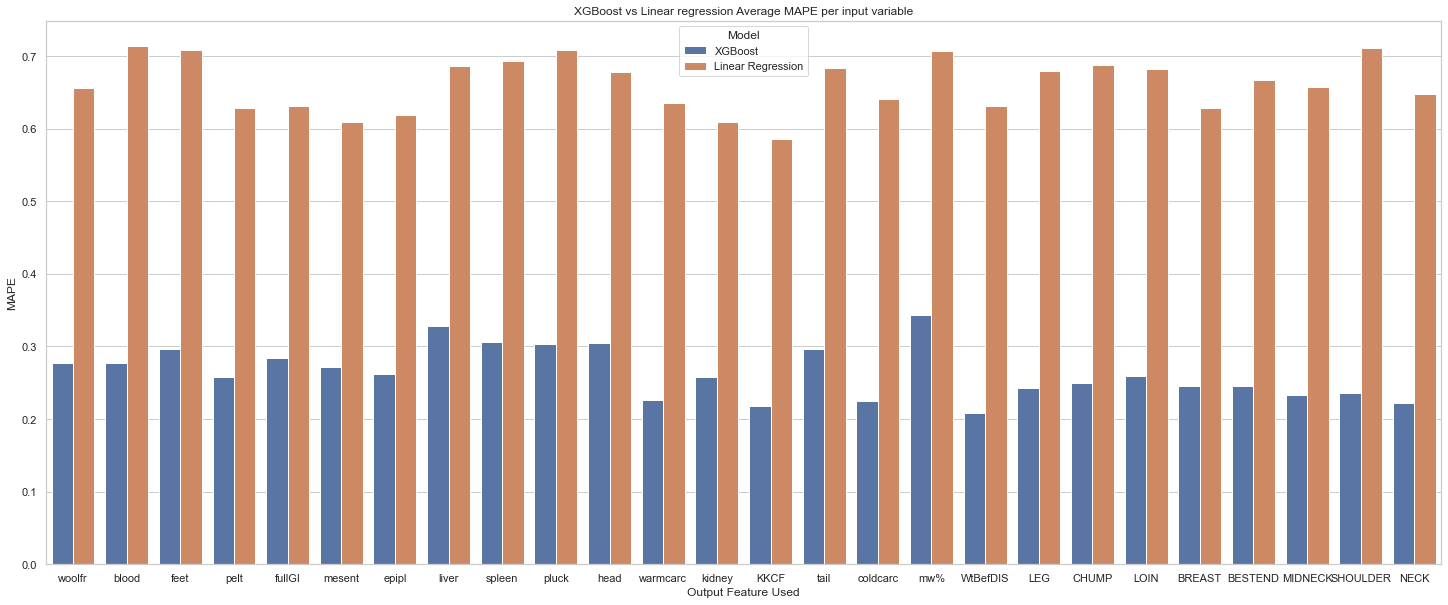

In [20]:
xgb_scores_df = pd.DataFrame([np.array(res_df['XGBoost RMSE'])], columns=y_scaled.columns)
lr_scores_df = pd.DataFrame([np.array(res_df['Linear Regression RMSE'])], columns=y_scaled.columns)
plt.figure(figsize=(25,10))
plt.title('XGBoost vs Linear regression Average MAPE per input variable')
sns.barplot(x="Output Feature Used", y="MAPE", hue="Model", data=plot_df)
plt.show()

* Στην περίπτωση του XGBoost, για την αρχική πρόβλεψη του "KKCF" έχουμε πιό υψηλό σφάλμα σε σχέση με άλλα
χαρακτηριστικά, ενώ στην περίπτωση του Linear Regression τα "warmcarc" και "coldcarc" είναι και τα
χαρακτηριστικά με το μικρότερο σφάλμα κατά την αρχική πρόβλεψη. Το αποτέλεσμα αυτό είναι αναμενόμενο καθώς τα βάρη αυτά
είναι γραμμικά εξαρτημένα και υψηλά συσχετισμένα με το αρχικό βάρος (slweight(g)) και ο linear regression προσεγγιζει
γραμμικά τα δεδομένα.
* Επομένως, ίσως θα ήταν καλύτερο να ξεκινήσουμε προβλέποντας τα χαρ/κα "warmcarc" ή "coldcarc" με Linear Regression για
το πρώτο βήμα της αλυσίδας (regression chain).

## Εκτέλεση Μοντέλων σε Νέα Δεδομένα (test set)

In [21]:
# Split train test sets (scaled dataset)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=96)

### Συγκριση σφαλμάτων στο Train set μετά το split

XGBoost
R2 score: 0.9738477502866643
MAE: 0.11487029784614894
RMSE: 0.1582321163642607
MAPE: 0.3399952484240603



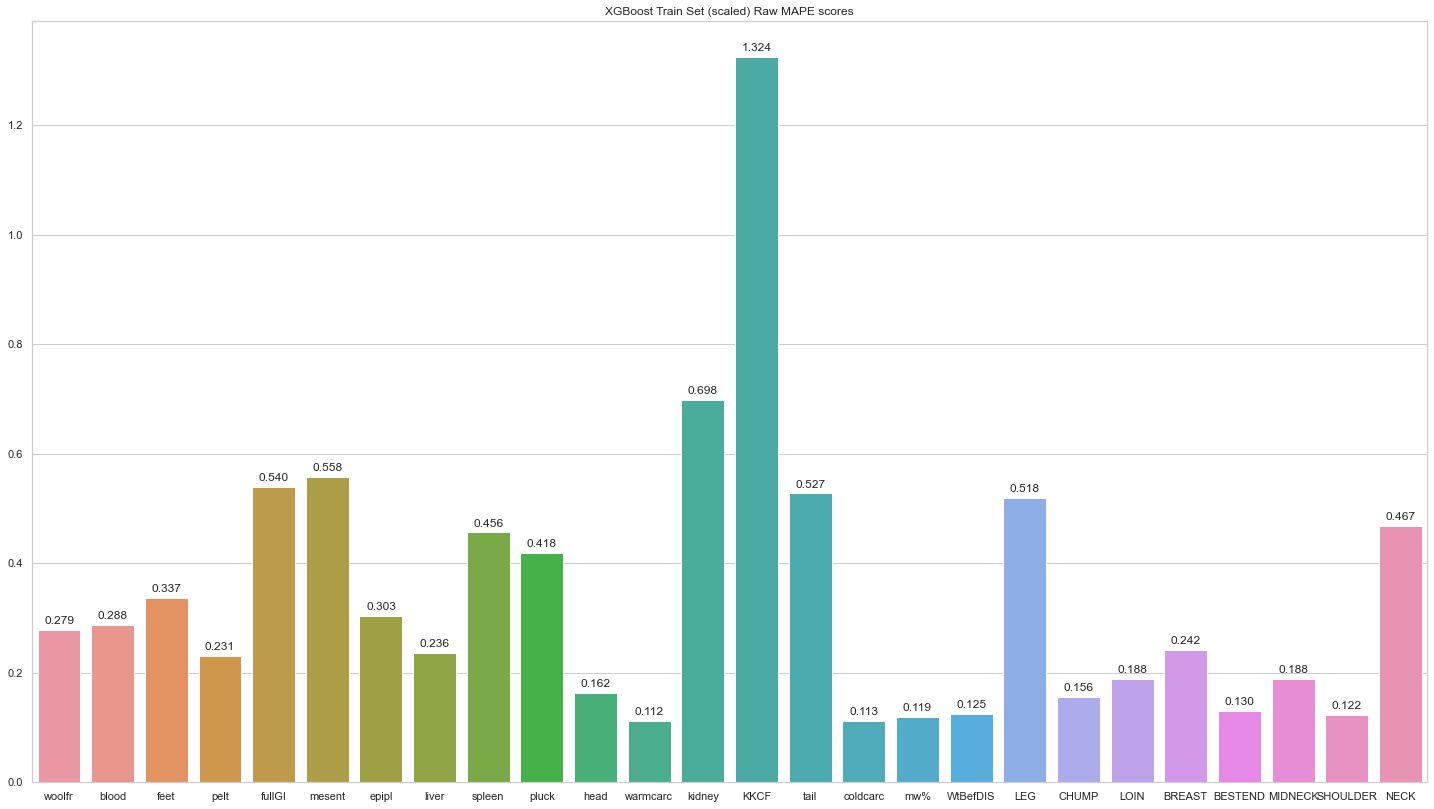

Linear Regression
R2 score: 0.9198966465272373
MAE: 0.19780782166222755
RMSE: 0.2652094046537572
MAPE: 0.5808839118720679



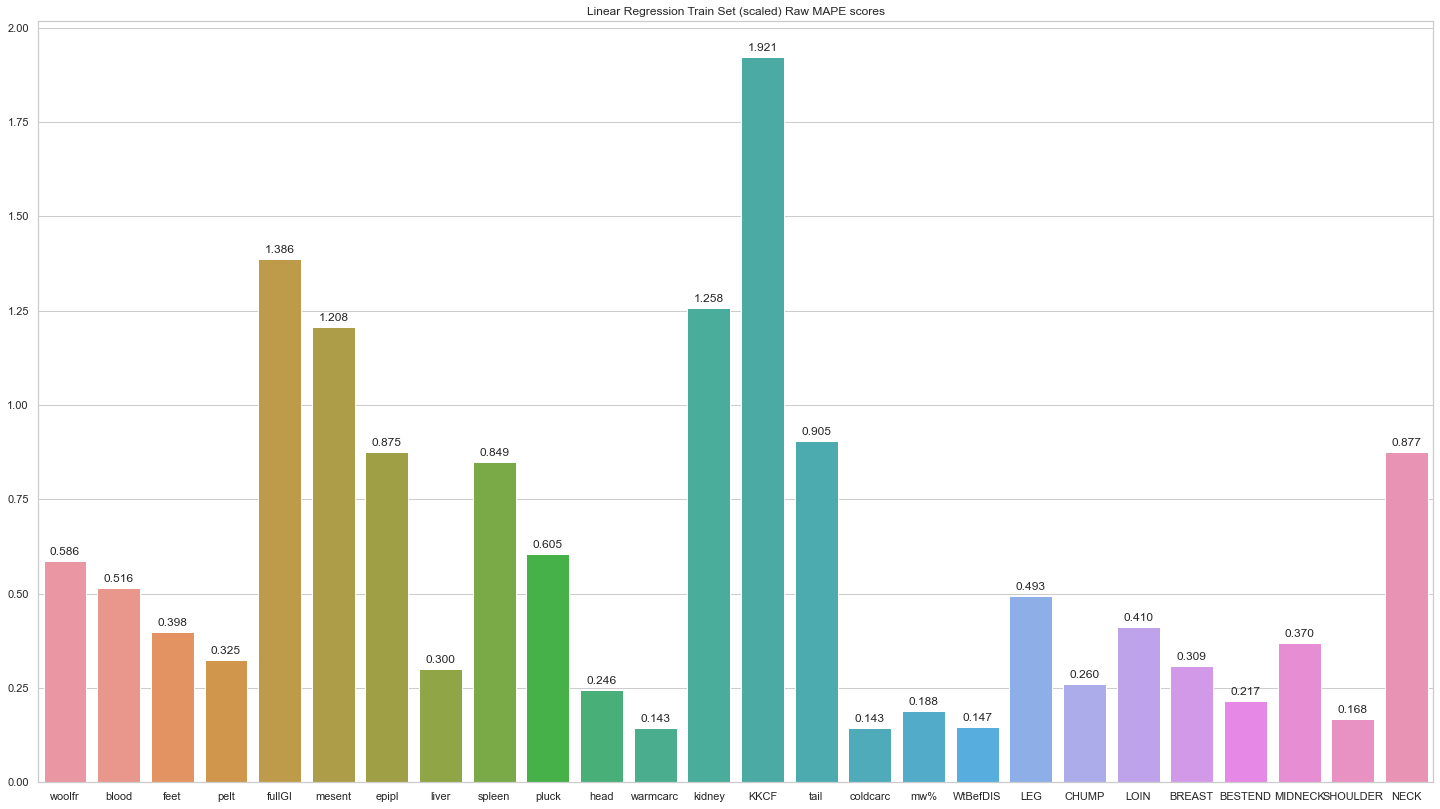

In [22]:
# Run for Train set
res = run_xgb_model(X_train, y_train)
print_results(res)
# Present raw rmse scores with a barplot
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='XGBoost Train Set (scaled) Raw MAPE scores')

res = run_lin_reg_model(X_train, y_train)
print_results(res)
# Present raw rmse scores with a barplot
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='Linear Regression Train Set (scaled) Raw MAPE scores')

### Συγκριση σφαλμάτων στο Test set μετά το split

XGBoost
R2 score: 0.8219657684804148
MAE: 0.24691288747798998
RMSE: 0.315965114804946
MAPE: 1.3655479736296918



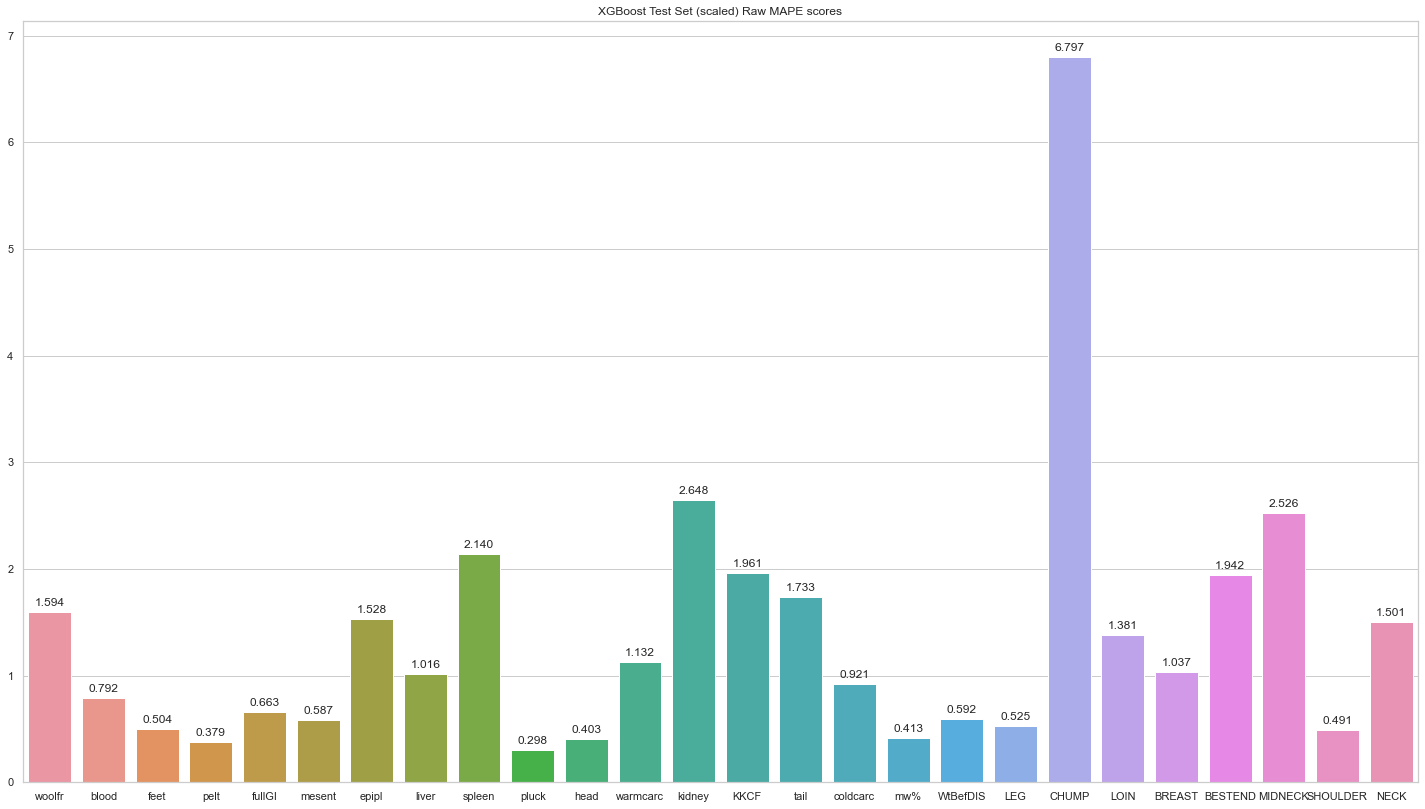

Linear Regression
R2 score: 0.8612833282751129
MAE: 0.20994260863014425
RMSE: 0.273989035952174
MAPE: 1.2005734719658294



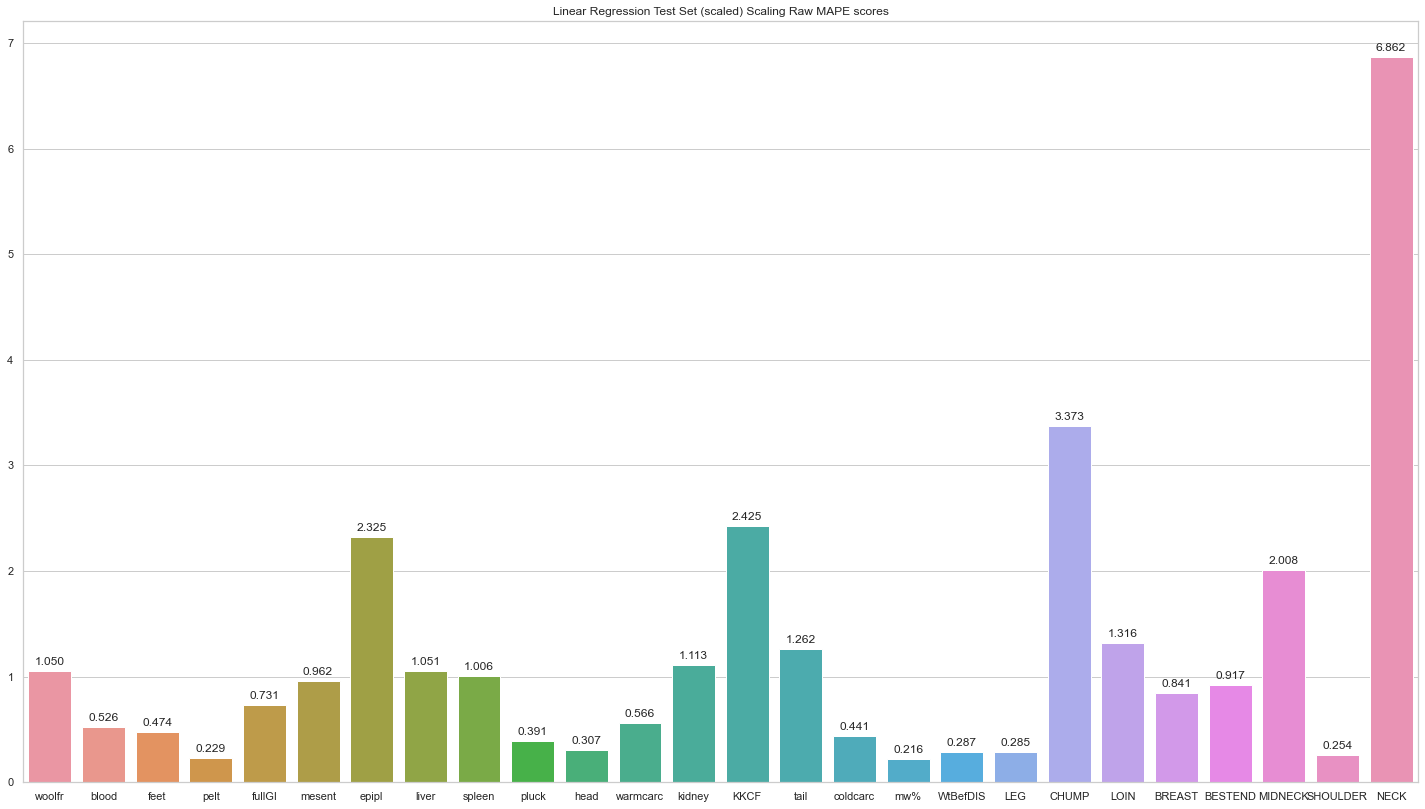

In [23]:
# Run for Test set
res = run_xgb_model(X_train, y_train, X_test, y_test)
print_results(res)
# Present raw rmse scores with a barplot
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='XGBoost Test Set (scaled) Raw MAPE scores')

res = run_lin_reg_model(X_train, y_train, X_test, y_test)
print_results(res)
# Present raw rmse scores with a barplot
scores_barplot(res['scores']['rv_scores_mape'], y.columns, title='Linear Regression Test Set (scaled) Scaling Raw MAPE scores')


* Ο XGBoost φαίνεται πως έχει πολύ μικρά σφάλματα στο train set και μικρότερα απο τον Linear regression σε όλες τις
εξαρτημένες μεταβλητές. Ωστόσο, στο test set ο Linear Regression είναι πολύ πιο κοντά στο σφάλμα με τον XGBoost γεγονός
που φανερώνει πως ο XGBoost ίσως κάνει overfit στα δεδομένα εκπαίδευσης.
* Επίσης, παρατηρούμε ότι σε εξαρτημένες μεταβλητές οι οποίες γνωρίζουμε πως έχουν γραμμική εξάρτηση απο το βάρος
(slweight) όπως το warmcarc, το coldcarc κ.α. τα δύο μοντέλα έχουν περίπου το ίδιο μικρό σφάλμα με τον Linear Regression
να έχει μικρότερο σφάλμα σε ορισμένες περιπτώσεις.
* Αυτό ίσως οφείλεται στο ότι ο Linear Regression είναι γραμμικό μοντέλο και προσεγγίζει καλύτερα γραμικές συσχετίσεις.
όπως είναι πολλές απο τις εξαρτημένες εταβλητές.